Muon constants <br>
https://pdglive.lbl.gov/Particle.action?node=S004&init=0

# PHYSICS OF MUONS AND EXPERIMENT

## Experimental Setup

**Components:**
- **Cosmic Ray Muons:** Source particles from atmospheric interactions
- **Scintillator:** Identifies muon arrival and electron/positron
- **Solenoid:** Generates uniform magnetic field (B ≈ 5.6 mT)
- **Absorber:** Copper block where muons decay


## Physics Principles

### Decay Process
$$\mu^+ \rightarrow e^+ + \nu_e + \bar{\nu}_\mu$$
$$\mu^- \rightarrow e^- + \bar{\nu}_e + \nu_\mu$$

### Without Magnetic Field
Simple exponential decay:
$$N(t) = N_0 e^{-t/\tau_\mu}$$

Muon lifetime: $\tau_\mu = 2.1969811 \pm 0.0000022$ μs

### With Magnetic Field
Muon spin precesses with frequency:
$$\omega = g_\mu \frac{eB}{2m_\mu c}$$

Time-dependent signal with oscillation:
$$N(t) = N_0 e^{-t/\tau_\mu}[1 + A \cos(\omega t + \phi)]$$


## Analysis Method
**MCMC fitting:**
- **B = 0:** Extract $\tau_\mu$ from exponential decay
- **B ≠ 0:** Extract $\omega$ from oscillating signal, so find $g_\mu$ from measured precession frequency

# STATISTICAL CHECK EXPERIMENTAL SET UP

In [1]:
set.seed(6)

In [2]:
flux <- 1/60 # muon / cm^2 / s
scintillator <- 50*50 # cm^2
lambda <- flux * scintillator # muon / s
tau.ideal <- 2.2e-6 # s
cat("Lambda, i.e. rate of",lambda,"muons/s")

Lambda, i.e. rate of 41.66667 muons/s

Warning message in mtext("Time [μs]", side = 1, line = 2, cex = 1.25):
“conversione fallita da 'Time [μs]' in 'mbcsToSbcs': punto sostituito per <ce>”
Warning message in mtext("Time [μs]", side = 1, line = 2, cex = 1.25):
“conversione fallita da 'Time [μs]' in 'mbcsToSbcs': punto sostituito per <bc>”
Warning message in text.default(0.8, 0.8, labels = bquote("P(2 muons <= 15μs)"), :
“conversione fallita da 'P(2 muons <= 15μs)' in 'mbcsToSbcs': punto sostituito per <ce>”
Warning message in text.default(0.8, 0.8, labels = bquote("P(2 muons <= 15μs)"), :
“conversione fallita da 'P(2 muons <= 15μs)' in 'mbcsToSbcs': punto sostituito per <bc>”
Warning message in text.default(0.8, 0.8, labels = bquote("P(2 muons <= 15μs)"), :
“metrica font sconosciuta per carattere Unicode U+03bc”


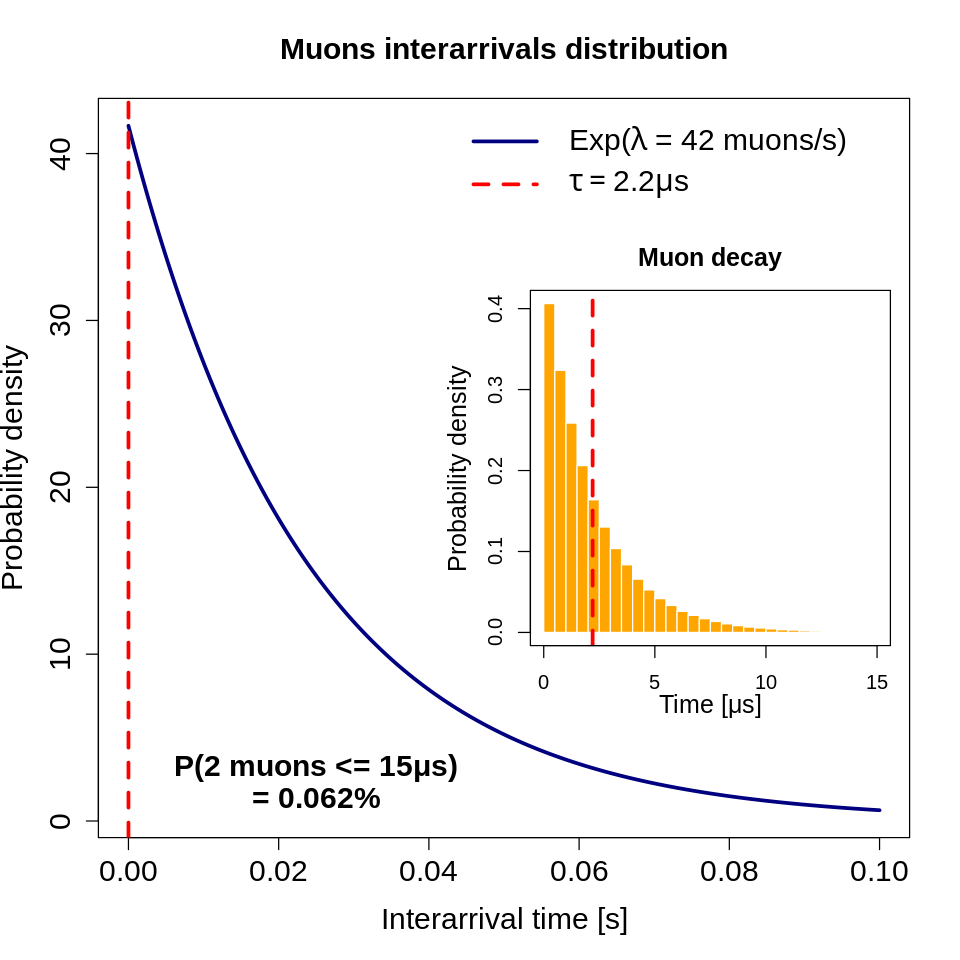

In [3]:
# cat( "Time at which 99% decay has occured",qexp(0.99,1/tau.ideal),"second" )

flux <- 1/60 # muon / cm^2 / s
scintillator <- 50*50 # cm^2
lambda <- flux * scintillator # muon / s
tau.ideal <- 2.2e-6 # s

# to save image
# png("2MuonsCoincidence.png", width = 7, height = 8, units = "in", res = 300)

# exponential of 2 muons arrival

t.range <- seq(0, 0.1, length.out = 1e4)

options(repr.plot.width = 8, repr.plot.height = 8)

plot(t.range, dexp(t.range, lambda), type='l', lwd=3, lty=1, xlim=c(0, 0.1),
     xlab = "Interarrival time [s]", ylab = "Probability density", 
     main = "Muons interarrivals distribution",
     cex.main=1.5, cex.lab=1.5, cex.axis=1.5, col = "navy")

abline(v = tau.ideal, col = "red", lwd = 3, lty = 2)

t.area <- seq(0, tau.ideal, length.out = 1000)
y.area <- dexp(t.area, lambda)
polygon(c(0, t.area, tau.ideal), c(0, y.area, 0), col = "purple", border = NA)

legend("topright", legend = c(expression(paste("Exp(", lambda, " = 42 muons/s)")), expression(tau == 2.2*mu*s)),
       col=c("navy", "red"), pch=c(NA, NA), lty=c(1, 2), lwd=3, cex=1.5, bty='n', pt.cex=c(1, 1))


# internal plot of muon decay
par(fig = c(0.45, 0.98, 0.2, 0.8), new = TRUE)
hist_data <- rexp(1e6, rate = 1/tau.ideal) * 1e6  # microseconds
hist(hist_data, breaks=50, col="orange", border="white", main="", xlab="", ylab="", prob=TRUE, axes = FALSE, xlim=c(0,15) )

abline(v=tau.ideal* 1e6, col="red", lwd=3, lty=2)

title(main="Muon decay", line=1, cex.main=1.25)
mtext("Time [μs]", side=1, line=2, cex=1.25)
mtext("Probability density", side=2, line=2.5, cex=1.25)

axis(1, cex.axis=1)
axis(2, cex.axis=1)
box()


# empty pannnel just for the write
par(fig=c(0, 1, 0, 0.5), new=TRUE)
plot(1, type="n", axes=FALSE, xlab="", ylab="", main="")

P.mistake <- pexp(15e-6, lambda) * 100  # in %
text(0.8, 0.8, labels = bquote("P(2 muons <= 15μs)"),cex=1.5, font=2)

text(0.8, 0.7, labels = paste( "= ",round(P.mistake,3),"%",sep=''), cex=1.5, font=2)

# to save image
#dev.off()

# SIMULATED DATA

In [4]:
G.mean  <- 2.00233184123 # pure number
G.sigma <- 0.00000000014 # pure number

TAU.mean  <- 2.1969811  # microseconds
TAU.sigma <- 0.0000022  # microseconds

B.mean  <- 5.6e-3  # Tesla
B.sigma <- 0.1e-3  # Tesla

MASS.mean  <- 105.6583755e6 # MeV/c^2
MASS.sigma <-   0.0000023e6 # MeV/c^2

c <- 299792458 # m/s
e <- 1.60217663e-19 # Coulomb

MASS.kg <- MASS.mean*e / c^2  # kg
MASS.kg.sigma <- e/c^2



OMEGA <- ((G.mean*e*B.mean) / (2*MASS.kg)) / 1e6  # MHz
#Error of omega:
#sigmaO <- sqrt((e*B.mean/(2*MASS.mean) * G.sigma)^2 + (G.mean*e/(2*MASS.mean) * B.sigma)^2 + (G.mean*e*B.mean/(2*MASS.mean)^2 * MASS.sigma)^2)
sigmaO <- sqrt(
  (e * B.mean / (2 * MASS.kg) * G.sigma)^2 +
  (G.mean * e / (2 * MASS.kg) * B.sigma)^2 +
  (G.mean * e * B.mean / (2 * MASS.kg^2) * MASS.kg.sigma)^2
)


cat("Omega is: ",OMEGA, "+-", sigmaO/1e6, "MHz. \n")

Omega is:  4.769047 +- 0.08516155 MHz. 


In [5]:
N0  <- 2e3 # number initial muons
A   <- 0.06 # linked to % polarized muons
phi <- 0.5   # initial phase

In [6]:
dt <- 0.05
t <- seq(dt/2, 8, dt) # microseconds
#Effeciency.Detector <- 0.8 # to introduce randomness even in the time component
#mask <- sample(c(TRUE, FALSE), size=length(t), replace=TRUE, prob=c(Effeciency.Detector,1-Effeciency.Detector))
#t <- t[mask]

Exp.decay <- function(t, N0, TAU) { return(N0 * exp(-t/TAU)) }
Exp.decay.oscill <- function(t, N0, TAU, OMEGA, A, phi) { return( N0 * exp(-t/TAU) * (1 + A*cos(OMEGA*t+phi)) ) }

N.noB.ideal <- Exp.decay(t, N0, TAU.mean)

N.withB.ideal <- Exp.decay.oscill(t, N0, TAU.mean, OMEGA, A, phi)

GenerateData <- function(t, N.ideal, show=FALSE) {

    set.seed(as.integer((as.numeric(Sys.time()) %% 1) * 1e8))
    
    sigma <- sqrt( N.ideal * ( 1-N.ideal/sum(N.ideal)) )  |> round(10)
    sigma <- pmax(sigma,1) |> as.integer()

    N <- rnorm( length(t),N.ideal, sigma ) |> round(10)
    N <- N + rnorm( length(t), 0, 1) #add some background noise
    N <- pmax( N,0 ) |> as.integer()
    
    sigma <- sqrt( N * ( 1-N/sum(N)) )  |> round(10)
    sigma <- pmax(sigma,1) |> as.integer()
        
    data <- data.frame(t=t, y=N, s=sigma)
    if (show) { 
        cat("head of dataframe:\n"); print( head(data,5) ); cat("\n") ;
        cat("tail of dataframe:\n");print( tail(data,5) ) ; cat("\n") }

    return(data)
    }

In [7]:
plot.data <- function(data, title, fit=NULL, col="red") {
    options(repr.plot.width=14,repr.plot.heigth=5)
    
    par(mfrow=c(1,2), mar = c(5, 6, 4, 2))
    
    # normal scale
     plot(data$t, data$y, type="n",
          xlab=expression("Time ["*mu*"s]"), ylab="Counts", main=title,
          cex.main=2.3, cex.axis=1.85, cex.lab=2)
    
     arrows(data$t, data$y-data$s, data$t, data$y+data$s,
               angle=90, code=3, length=0.02, col="lightblue")
    
     points(data$t, data$y, pch=16, col=col, cex = 0.5)
    
    if (!is.null(fit)) {
        lines(data$t,fit, col="green", lwd = 3)
        legend(4,1700, legend=c("Data", "Result STAN"), col = c(col,"green"), bty="n",
        pch=c(19, NA),lty=c(NA,1),lwd=c(NA,3),cex=1.5,seg.len=0.5,x.intersp=0.2)
        }
    
    
    
    # log scale
     plot(data$t, pmax(data$y,1), log="y", yaxt="n", type="n",
          xlab=expression("Time ["*mu*"s]"), ylab="Counts", main=title,
          cex.main=2.3, cex.axis=2, cex.lab=2)

     # ticks for log scale
     custom_ticks <- c(seq(10, 100, by = 10), seq(200, 1000, by = 100), 2000)
     major_ticks <- c(100, 1000)
     minor_ticks <- setdiff(custom_ticks, major_ticks)
     axis(2, at = minor_ticks, labels = FALSE, tcl = -0.6)
     axis(2, at = 10^(0:3), labels = parse(text = paste0("10^", 0:3)), las = 1, tcl = -1, cex.axis = 2)
     
     arrows(data$t, data$y-data$s, data$t, data$y+data$s,
               angle=90, code=3, length=0.02, col="lightblue")
    
     points(data$t, pmax(data$y,1), pch=16, col=col, cex = 0.5)


    
    
    if (!is.null(fit)) {
        lines(data$t,fit, col="green", lwd = 3)
        legend(4,1700, legend=c("Data", "Result STAN"), col = c(col,"green"), bty="n",
        pch=c(19, NA),lty=c(NA,1),lwd=c(NA,3),cex=1.5,seg.len=0.5,x.intersp=0.2)
        }
    
    }

In [8]:
data.noB <- GenerateData(t, N.noB.ideal, show=TRUE)

head of dataframe:
      t    y  s
1 0.025 1985 44
2 0.075 1960 43
3 0.125 1887 42
4 0.175 1831 42
5 0.225 1791 41

tail of dataframe:
        t  y s
156 7.775 54 7
157 7.825 52 7
158 7.875 61 7
159 7.925 49 6
160 7.975 42 6



In [9]:
data.withB <- GenerateData(t, N.withB.ideal, show=TRUE)

head of dataframe:
      t    y  s
1 0.025 2111 45
2 0.075 1940 43
3 0.125 2016 44
4 0.175 1915 43
5 0.225 1713 40

tail of dataframe:
        t  y s
156 7.775 65 8
157 7.825 51 7
158 7.875 63 7
159 7.925 56 7
160 7.975 51 7



In [10]:
data <- list(data.noB, data.withB)

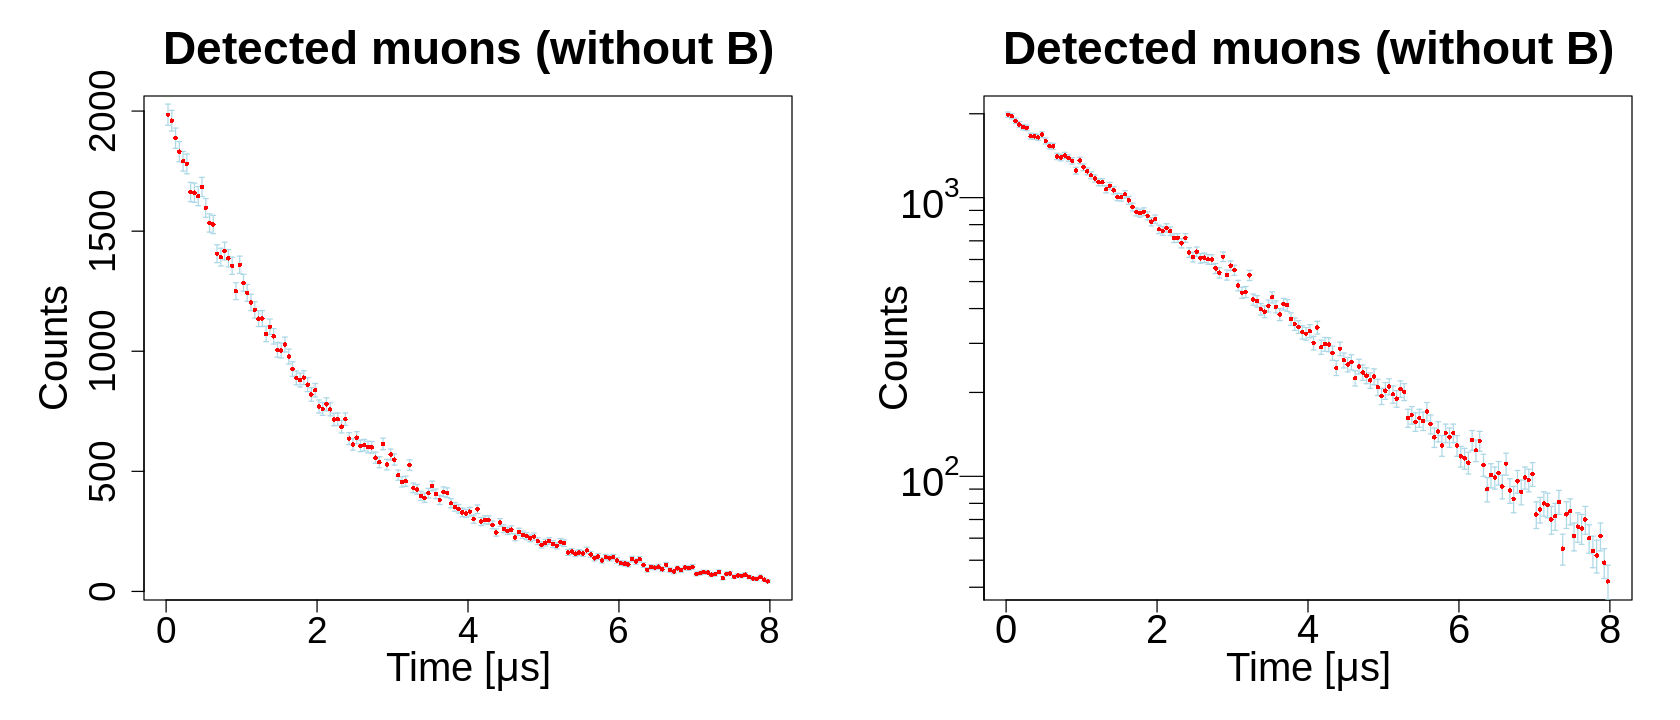

In [11]:
#png("SimDataNoB2.png", width = 8, height = 4, units = "in", res = 300)
options(repr.plot.width = 14, repr.plot.height = 6)
plot.data(data.noB,"Detected muons (without B)")
#dev.off()

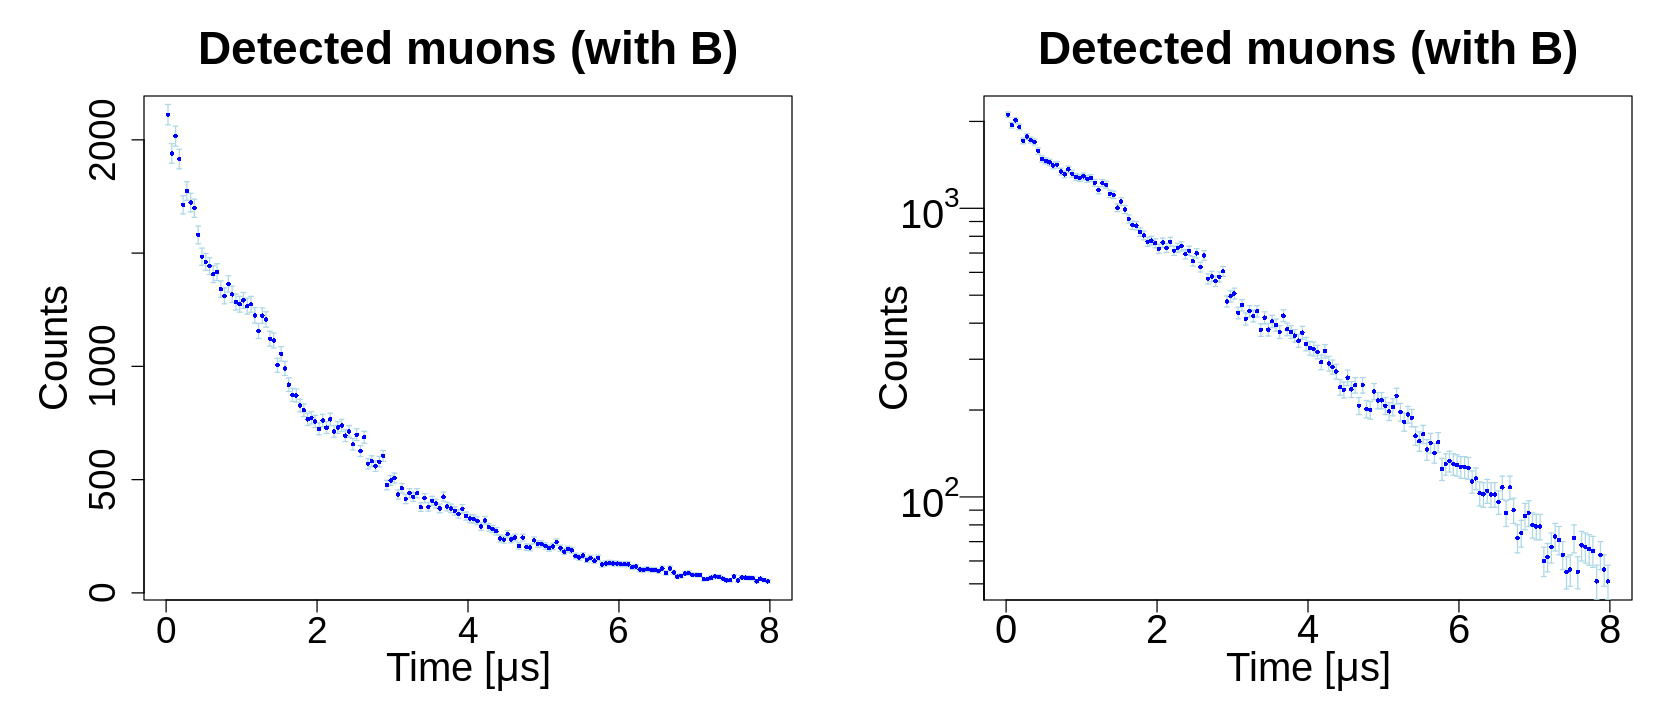

In [12]:
#png("SimDataWithB2.png", width = 8, height = 4, units = "in", res = 300)
options(repr.plot.width = 14, repr.plot.height = 6)
plot.data(data.withB, "Detected muons (with B)", col="blue")
#dev.off()

# MCMC ANALYSIS: STAN

In [13]:
library("rstan")
options (mc.cores=parallel::detectCores())
rstan_options (auto_write=TRUE)
library("coda")

Warning message:
“il pacchetto ‘rstan’ è stato creato con R versione 4.3.3”
Caricamento del pacchetto richiesto: StanHeaders

Warning message:
“il pacchetto ‘StanHeaders’ è stato creato con R versione 4.3.3”

rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Warning message:
“il pacchetto ‘coda’ è stato creato con R versione 4.3.3”

Caricamento pacchetto: ‘coda’


Il seguente oggetto è mascherato da ‘package:rstan’:

    traceplot




In [14]:
# varsatile way, so we can change model since evry time copy & paste

data.model.stan <- "data {
        int<lower=0> n;
        vector[n] t;
        vector<lower=0>[n] y;
        vector<lower=0>[n] s;
}\n"

parameters <- c(
    noB = "parameters {
        real<lower=0> N0;
        real<lower=0> tau;
    }\n",
    withB = "parameters {
        real<lower=0> N0;
        real<lower=0> tau;
        real<lower=0, upper=1> A;
        real<lower=3, upper=6> omega;
        real<lower=-3.14159, upper=3.14159> phi;
        real<lower=0> B;

        
    }\n"   
)

TransfParam <- 
    'transformed parameters {
        real e_charge = 1.602e-19;       // C
        real muon_mass = 1.8835e-28;     // kg
        real gmu = (2 * muon_mass * omega*1e6) / (e_charge * B /1e3); // B in mT
        real pi = 3.14159;
    } \n'

model <- c(
    noB = "model {
        N0 ~ normal(y[1],sqrt(y[1])) ;
        tau ~ uniform(1, 4) ;
        for (i in 1:n) { y[i] ~ normal( N0*exp(-t[i]/tau), s[i] ); }
    }\n",
    withB = "model {
        N0 ~ normal(y[1],sqrt(y[1])) ;
        tau ~ normal(2.17, 0.1) ;
        A ~ uniform(0,1) ;
        omega ~ uniform(3, 6) ; 
        phi ~ uniform(-1*pi, pi) ;
        
        B ~ normal(5.6, 0.3);

        for (i in 1:n) { y[i] ~ normal( N0*exp(-t[i]/tau)*(1+A*cos(omega*t[i] +phi )), s[i] ); }
    }\n"
)


stan.string <- c(noB = paste0(data.model.stan,parameters[1], model[1]), withB = paste0(data.model.stan, parameters[2], TransfParam, model[2]))
data.stan = lapply( 1:2, function(i) { list( n=length(t), t=data[[i]]$t, y=data[[i]]$y, s=data[[i]]$s ) } )

In [15]:
analysis.bayes <- function(stan.string, data.stan, which.model, nIter=5000, nChains=2, thin=1, warmup=200) {

   stan <- stan.string[ which.model ]
   data <- data.stan[[which.model]]
   params <- switch( which.model, c('N0', 'tau') , c("N0", "tau", "A", 'omega', 'phi','gmu') )
   stan.model <- stan_model( model_code = stan )

   stan.fit <- sampling(stan.model, data, pars=params, iter=nIter, chains=nChains, warmup=warmup, thin=thin, control = list(adapt_delta = 0.99), seed = 6)

   cat( switch( which.model, "WITHOUT B\n" , "WITH B\n" ) )
   print(summary(stan.fit))
   array <- as.array(stan.fit)
   return(array)
}

In [16]:
PlotPosteriorParam <- function(array.mcmc, which.model, save.to.file = FALSE, filename = 'None.png'){

    if (save.to.file) {
        png(file = filename, width = 1400, height = 1200)
    }
    n.chains <- ncol(array.mcmc)
    all.mcmc.coda <- mcmc.list( lapply (1:n.chains, function (x) { mcmc(array.mcmc[,x,]) })) # is a list of mcmc

    
    params <- switch( which.model, c('N0', 'tau')  , c("N0","tau","A",'omega', 'phi', 'gmu') )
    means <- numeric(length(params))

    latexParams <- switch(which.model, c(expression(N[0]), expression(tau)), c(expression(N[0]), expression(tau),
                                                                                expression(A), expression(omega), 
                                                                                expression(phi), expression(g[mu]) ))

    latexParamsPost <- switch(which.model, c(expression(N[0]), expression(tau~"["*mu*"s"*"]")), c(expression(N[0]), expression(tau~"["*mu*"s"*"]"),
                                                                                expression(A), expression(omega~"[MHz]"), 
                                                                                expression(phi), expression(g[mu]) ))

    colors <- c("orange", "lightgreen", "pink", "lightblue", "yellow", 'plum')

    options(repr.plot.width=10, repr.plot.height=10)

    # for cycle on all parameters
    for(i in 1:length(params)) {

        par(mfrow=c(1, 1), oma=c(0,0,3,0), mar = c(5, 6, 4, 2))
        layout.matrix <- matrix(c(1, 2, 1, 3), nrow = 2, ncol = 2)
        layout(mat = layout.matrix,
        heights = c(1, 1), 
        widths = c(2.5, 1.5))
        
        # the chain interations
        for(j in 1:n.chains) {
            iteration.chain <- array.mcmc[,j,params[i]]
            max <- sapply( 1:n.chains, function(k) { max( array.mcmc[,k,params[i]] ) } ) |> max()
            min <- sapply( 1:n.chains, function(k) { min( array.mcmc[,k,params[i]] ) } ) |> min()
            
            if (j == 1) { plot(iteration.chain,type="l",col=j, cex.axis=1.7,cex.main=2.1,cex.lab=1.7,
                        main="MCMCs",ylab = latexParams[i],xlab="# Interactions",ylim=c(min,max) ) }
            else {  lines(iteration.chain, col = j) }
        }

        
        mtext(latexParams[i], outer=TRUE, cex=2, font=2)

        #autocorrelation
        my.lags <- 0:80
        for(j in 1:n.chains) {
            mcmc.coda <- all.mcmc.coda[[j]] # j-th chain
            acf <- autocorr(mcmc.coda[ ,params[i] ],lags=my.lags)
            if (j == 1) {
                plot(my.lags,acf,ylim=c(-0.2,1),type="b",pch=16,col=j,main="MCMCs autocorrelation",
                xlab="lag",ylab="ACF",cex.axis=1.7,cex.main=2.1,cex.lab=1.7)
            }
            else {
                lines(my.lags,acf,type="b", pch=16,col=j)
            }
        }
        text(20,0.6,paste( "Effective Size:",round(effectiveSize(mcmc.coda[,params[i]]),2)),pos=4,cex=1.5)

        all.data.param <- array.mcmc[,,params[i]]
        mean <- mean(all.data.param)
        means[i] <- mean
        CI <- quantile(all.data.param, c(0.025, 0.975))
        
        # density distribution
        for(j in 1:n.chains) {
            dens <- array.mcmc[,,params[i]]
            if (n.chains > 1){
                max <- sapply( 1:n.chains, function(k) { max(density(dens[,k])$y) } ) |> max()
                min <- sapply( 1:n.chains, function(k) { min(density(dens[,k])$y) } ) |> min()

                if (j == 1) { plot( density( dens[, j] ),main="Density distribution",
                            col=j,cex.axis=1.6,cex.main=1.7,cex.lab=1.6,xlab=latexParams[i],
                            ylim=c(min,max) )
                                lines(c(CI[1],CI[2]),c(0,0),lwd=4)
                                text(mean, (max-min)*0.1, "95% CI",cex=1.7)
                            }   
                else { lines( density(dens[,j]),col=j ) }
            }
            else{
                max <- sapply( 1:n.chains, function(k) { max(density(dens)$y) } ) |> max()
                min <- sapply( 1:n.chains, function(k) { min(density(dens)$y) } ) |> min()

                plot( density( dens ),main="Density distribution",
                            col=j,cex.axis=1.7,cex.main=2.1,cex.lab=1.7,xlab=latexParams[i],
                            ylim=c(min,max) )
                                lines(c(CI[1],CI[2]),c(0,0),lwd=4)
                                text(mean, (max-min)*0.1, "95% CI",cex=1.7)
                }
        }
    
        
        layout.matrix <- matrix(c(1,0), nrow=2, ncol=1)
        layout(mat = layout.matrix,
        heights = c(3,0.5),
        widths = c(2))
        


        par(mar = c(5, 6, 4, 2))
        # histrogram of posterior distribution
        h <- hist(all.data.param, breaks=50, probability=TRUE, main=paste("Posterior distribution"),
        xlab=latexParamsPost[i],ylab="Probability density",col=colors[i],border="darkgrey",xaxs="i",cex.axis=2,cex.main=2.3,cex.lab=2)    
        abline( v=mean, col="red", lwd=2, lty=2)

        h$density
        y_pos <- 0.6 * max(h$density)
        text(0.9*mean+0.1*CI[2],y_pos, paste("mean: ",round(mean,3)), srt=90,cex=1.8)
        
        # 95% CI
        abline(v=CI, col="red", lwd=1, lty=3)
        text(0.9*CI[1]+0.1*mean,y_pos,paste("lower 95% CI: ",round(CI[1],3)),cex=1.7,srt=90)
        text(0.9*CI[2]+0.1*mean,y_pos,paste("upper 95% CI: ",round(CI[2],3)),cex=1.7,srt=90)
    }

    if (save.to.file) {
        dev.off()
    }

    names(means) <- latexParams
    return(means)
}

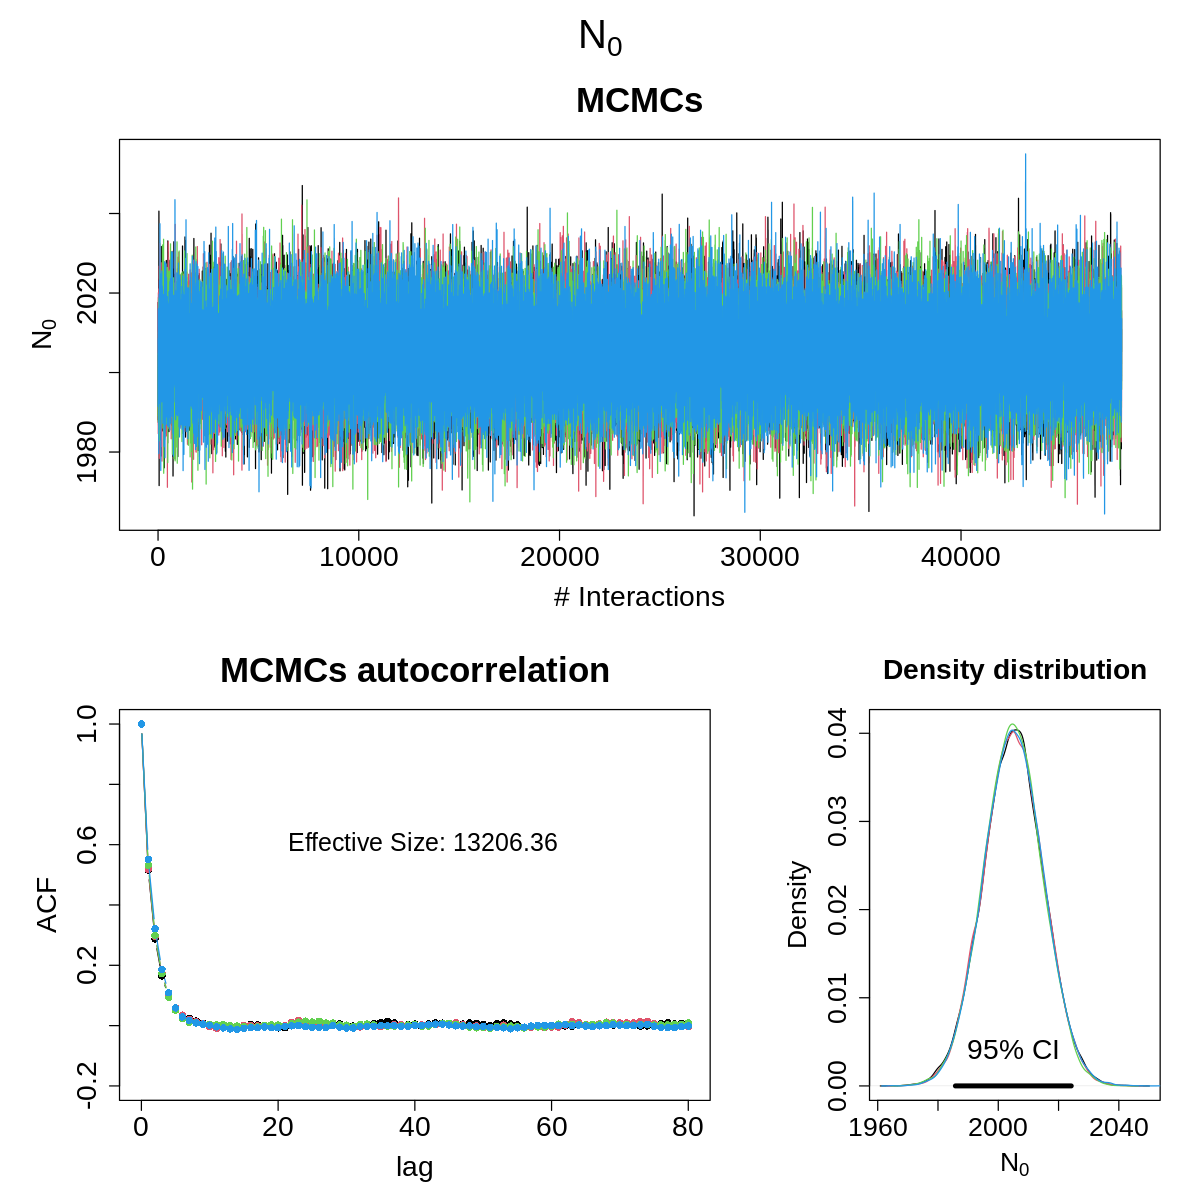

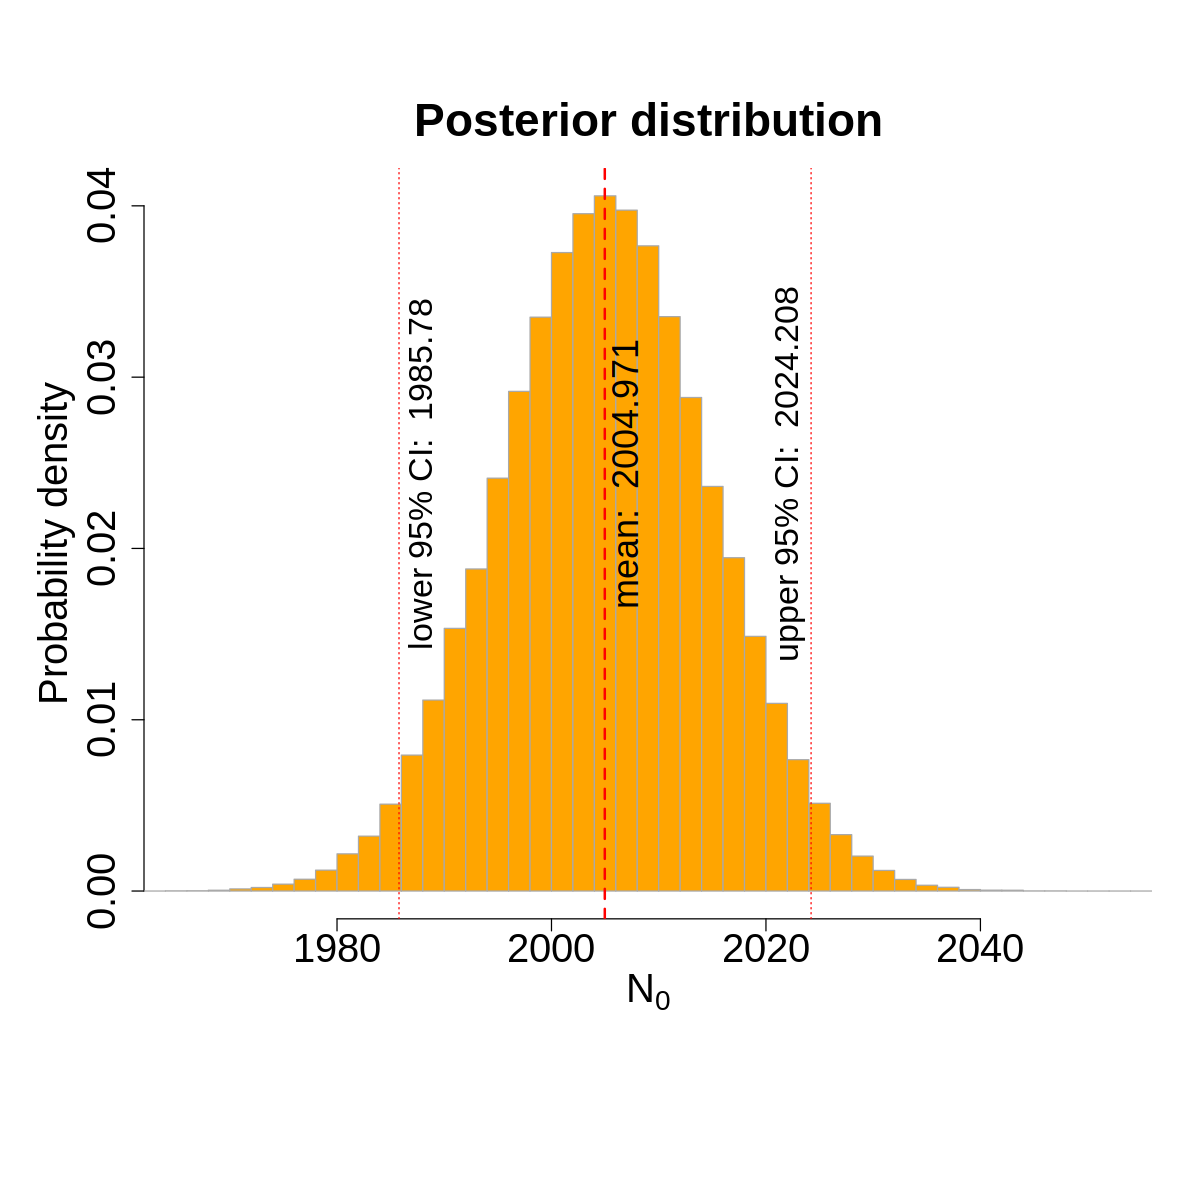

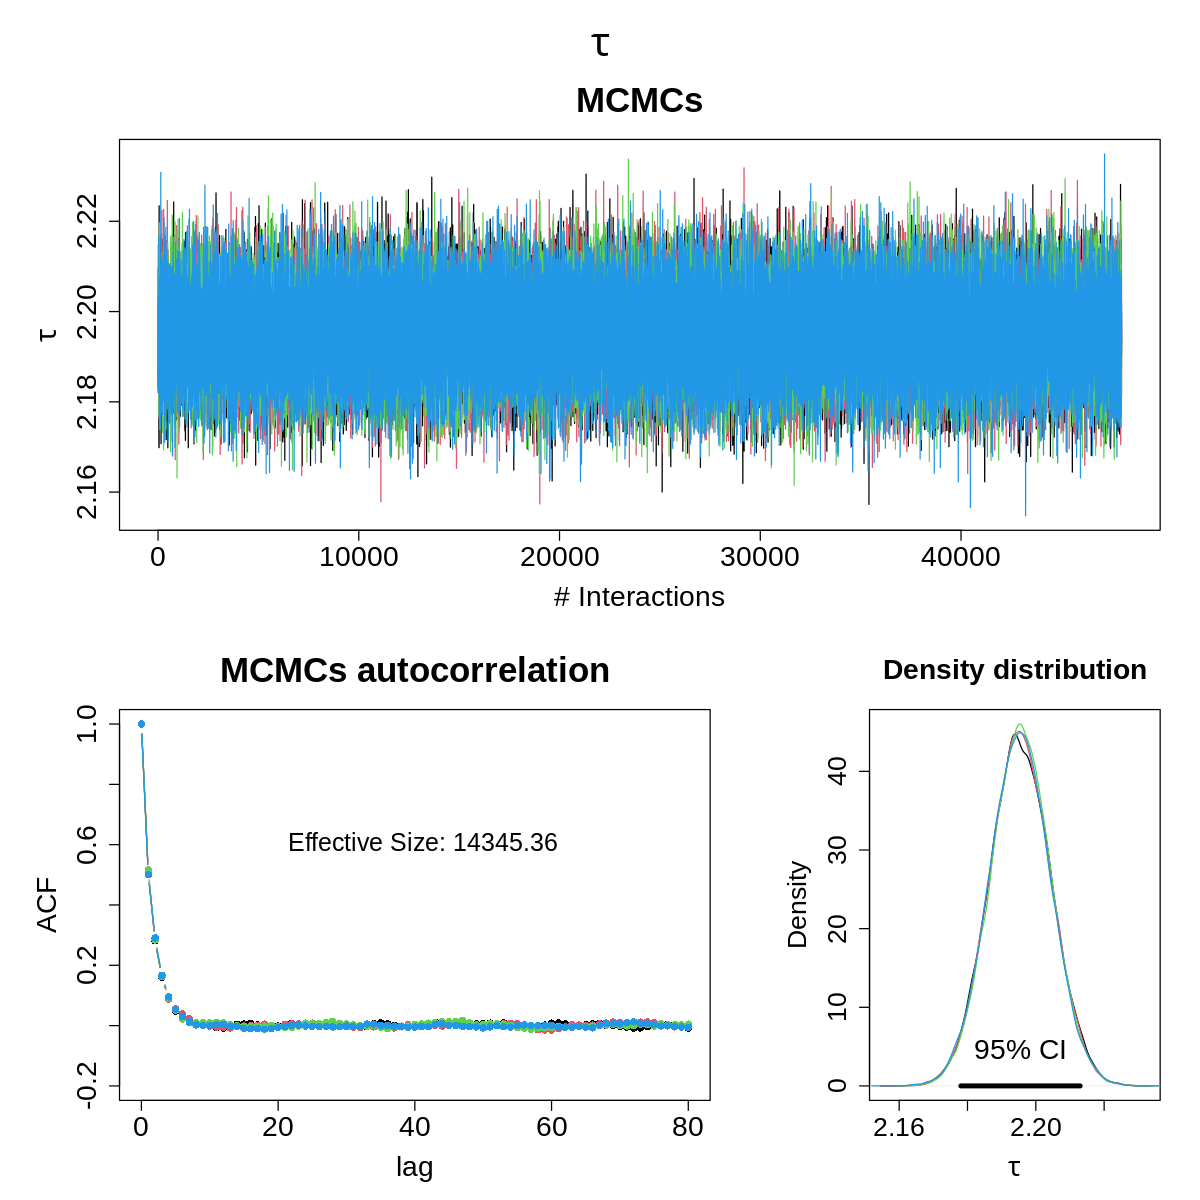

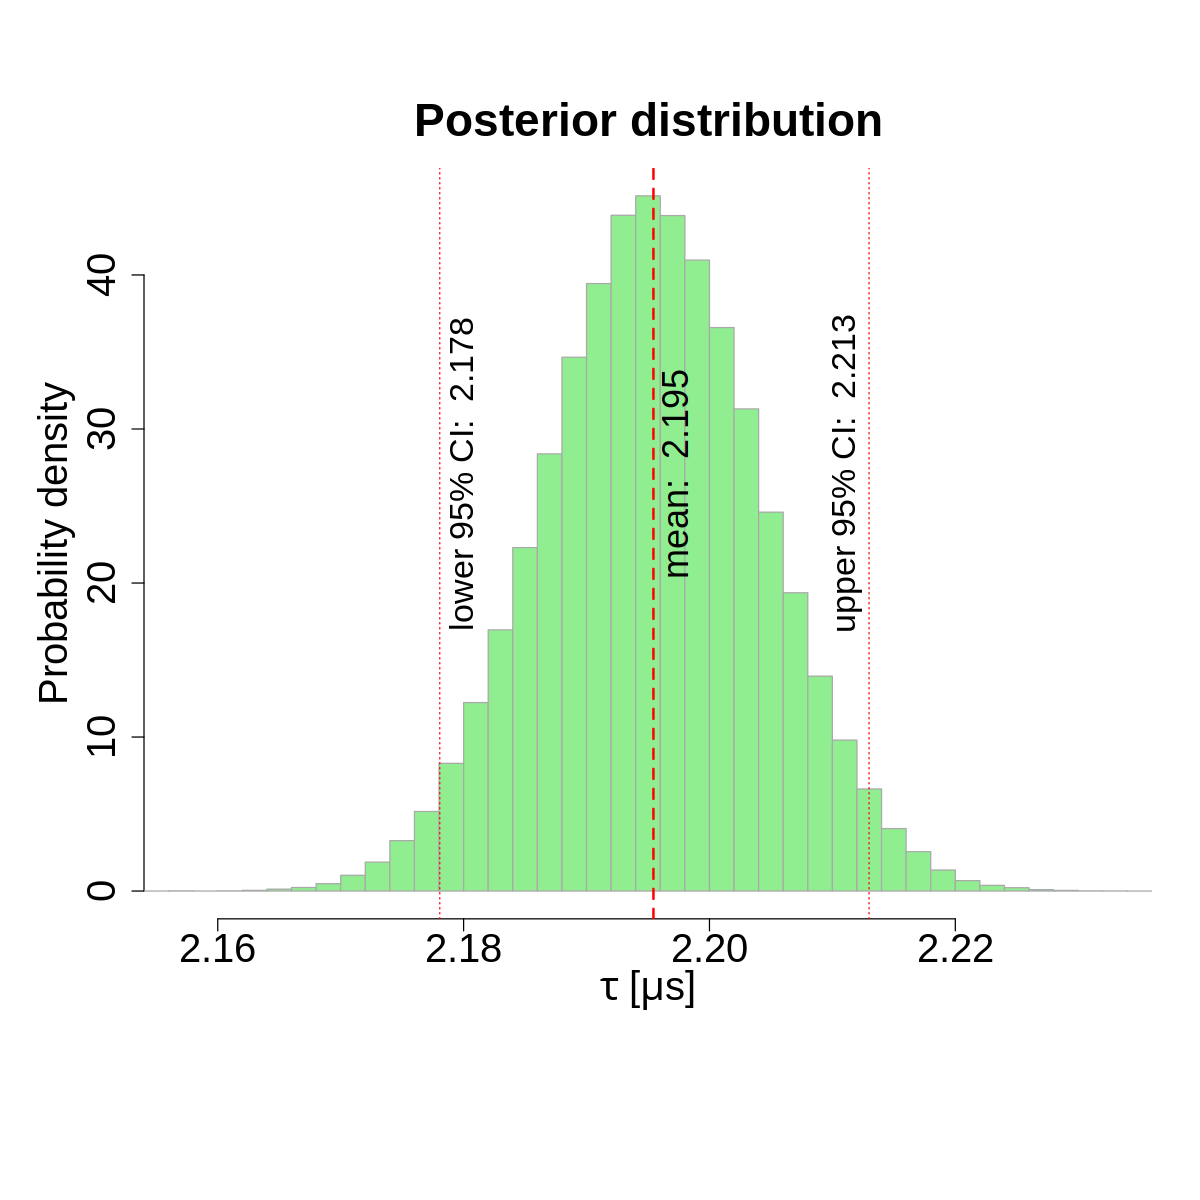

In [17]:
which.model <- 1
n.chains <- 4
STAN_NoB_array.mcmc <- analysis.bayes(stan.string, data.stan, which.model, nIter = 50000, nChains = n.chains, thin =1, warmup=2000)

result.STAN.noB <- PlotPosteriorParam(STAN_NoB_array.mcmc, which.model)

11.85990417 2024.92598059
    tau      2.18379627    2.19548915
    A        0.06584732    0.07192626
    omega    4.80164355    4.86367637
    phi      0.41980474    0.56849755
    gmu      2.07914045    2.24183927
    lp__   -76.08479209  -74.96995000

, , chains = chain:4

         stats
parameter          mean           sd          2.5%           25%           50%
    N0    2004.92467482 10.360758080 1984.63444095 1997.87265264 2004.89529815
    tau      2.17770717  0.009055816    2.15999377    2.17157808    2.17770031
    A        0.06259883  0.004803445    0.05317081    0.05937839    0.06259821
    omega    4.77042750  0.047321167    4.67832093    4.73859039    4.77001702
    phi      0.34046303  0.117878619    0.10506746    0.26138683    0.34183585
    gmu      2.01027426  0.110904920    1.81002038    1.93295573    2.00441690
    lp__   -77.39213681  1.747606686  -81.64057276  -78.33532913  -77.06020625
         stats
parameter           75%         97.5%
    N0    2011.89406727

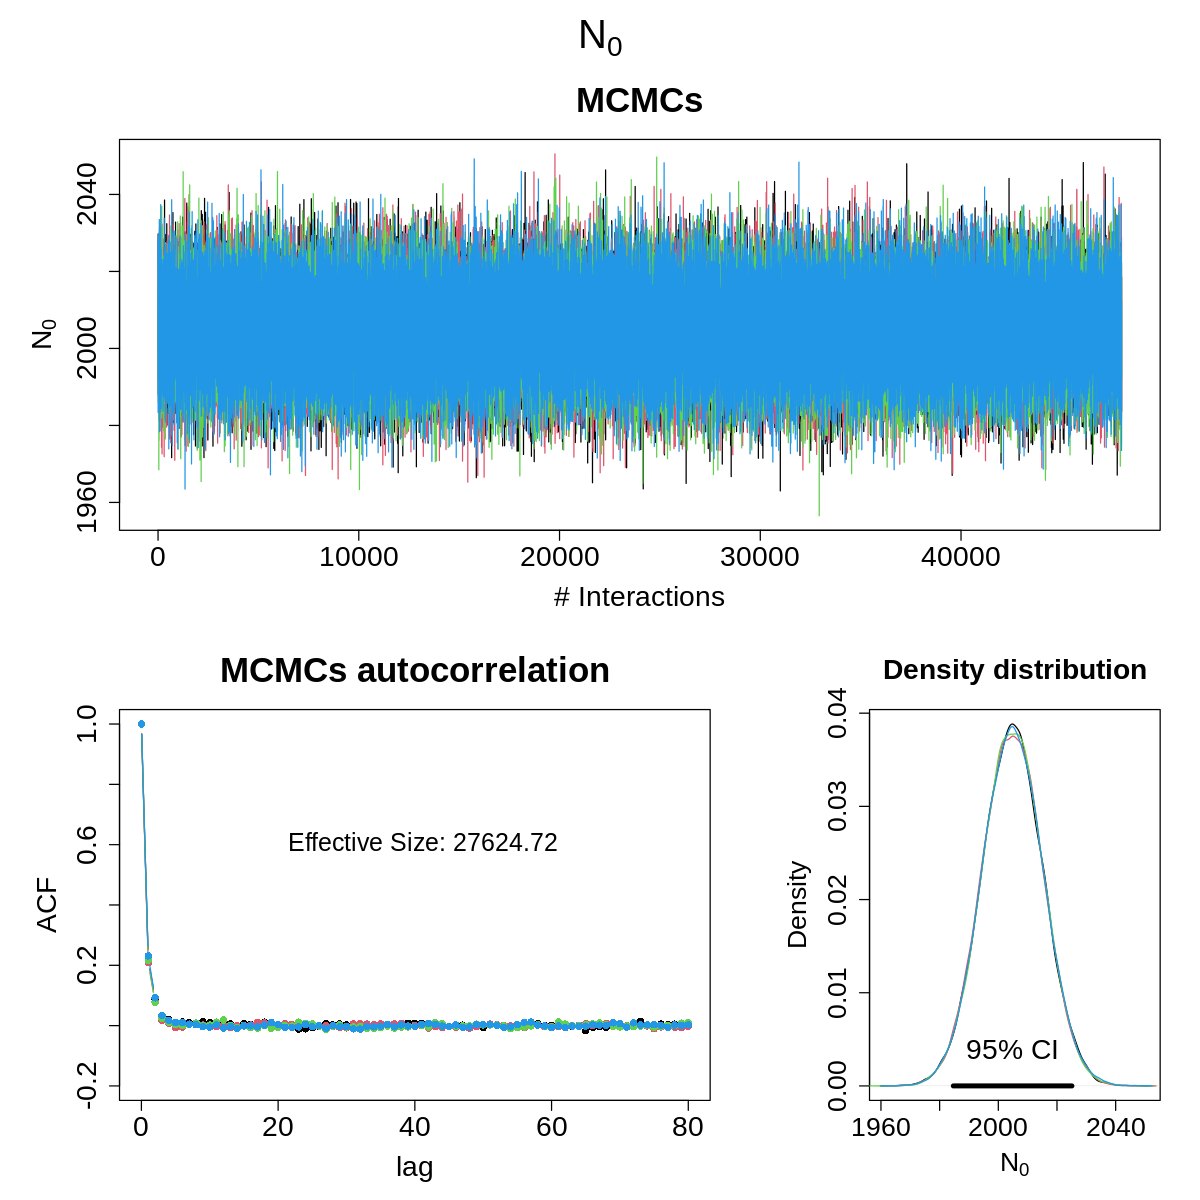

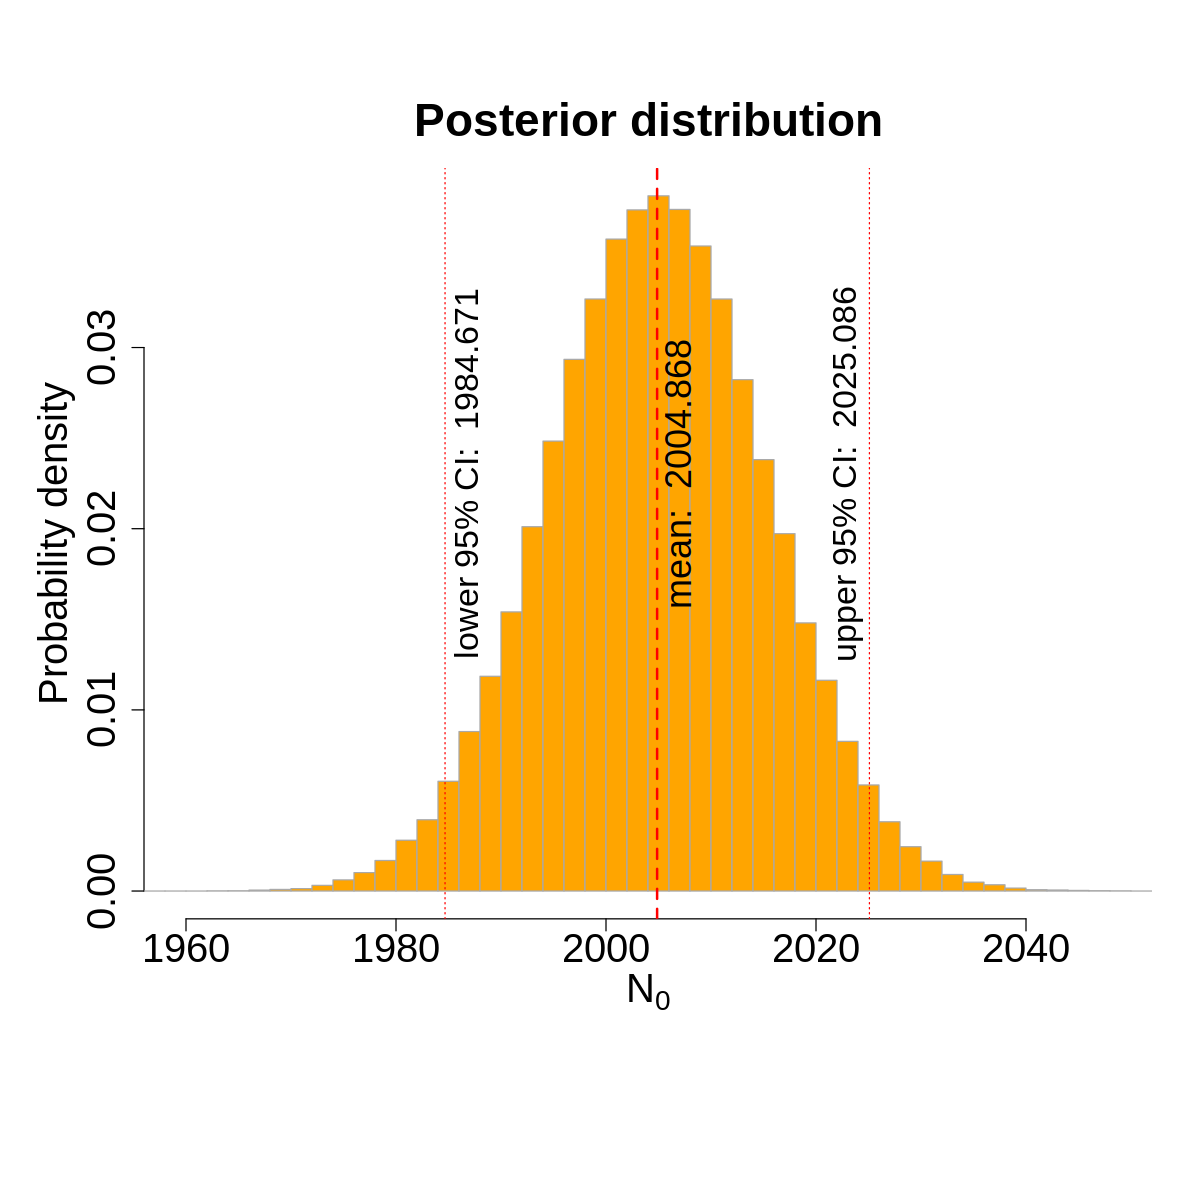

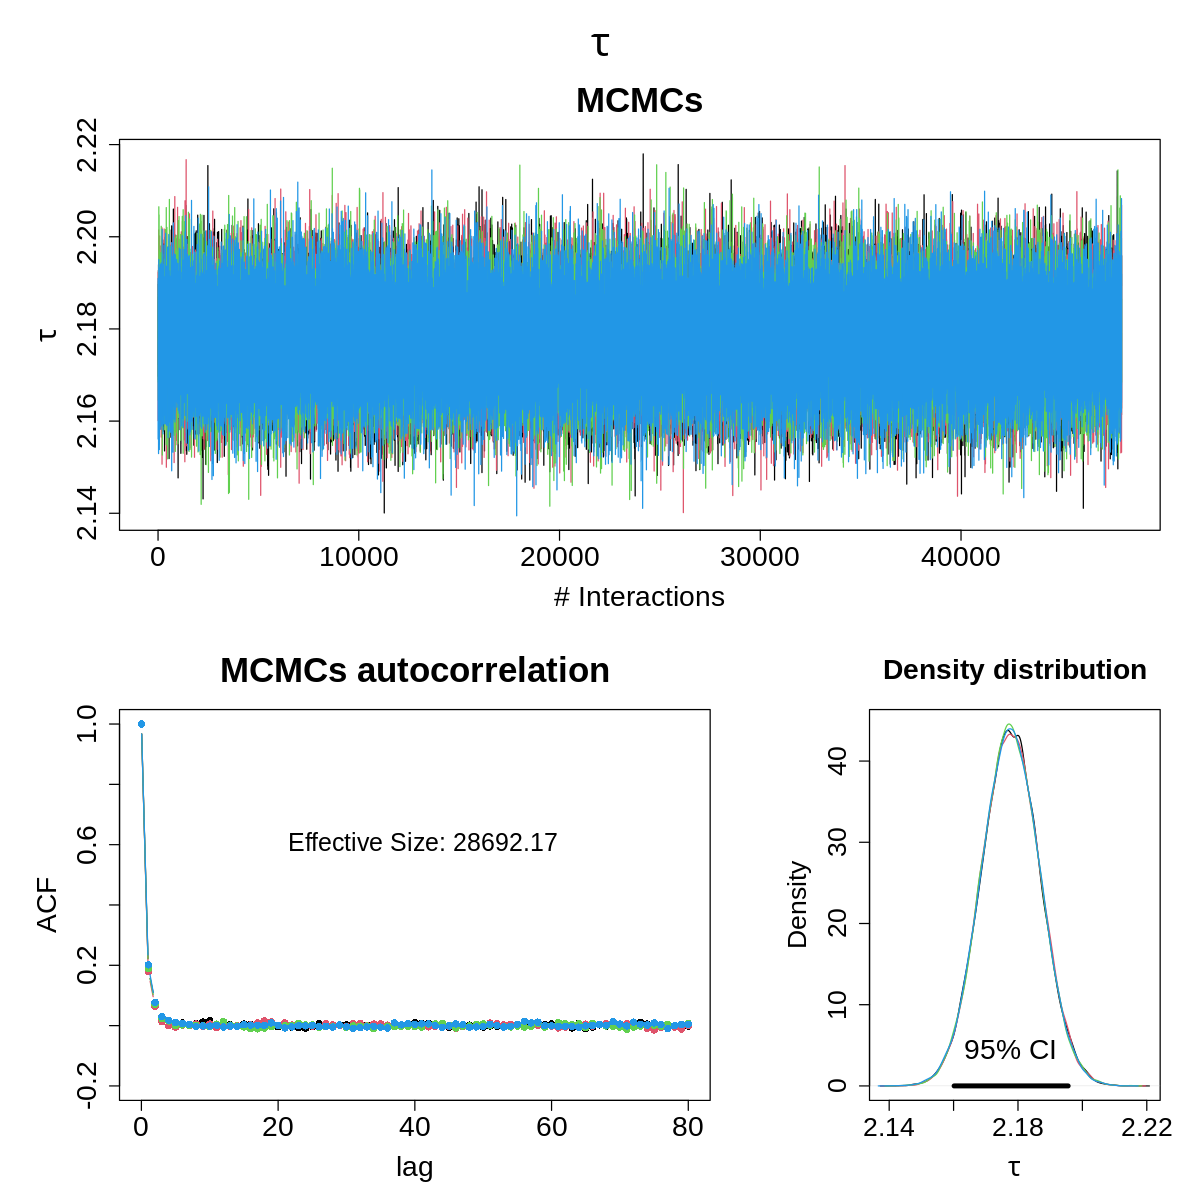

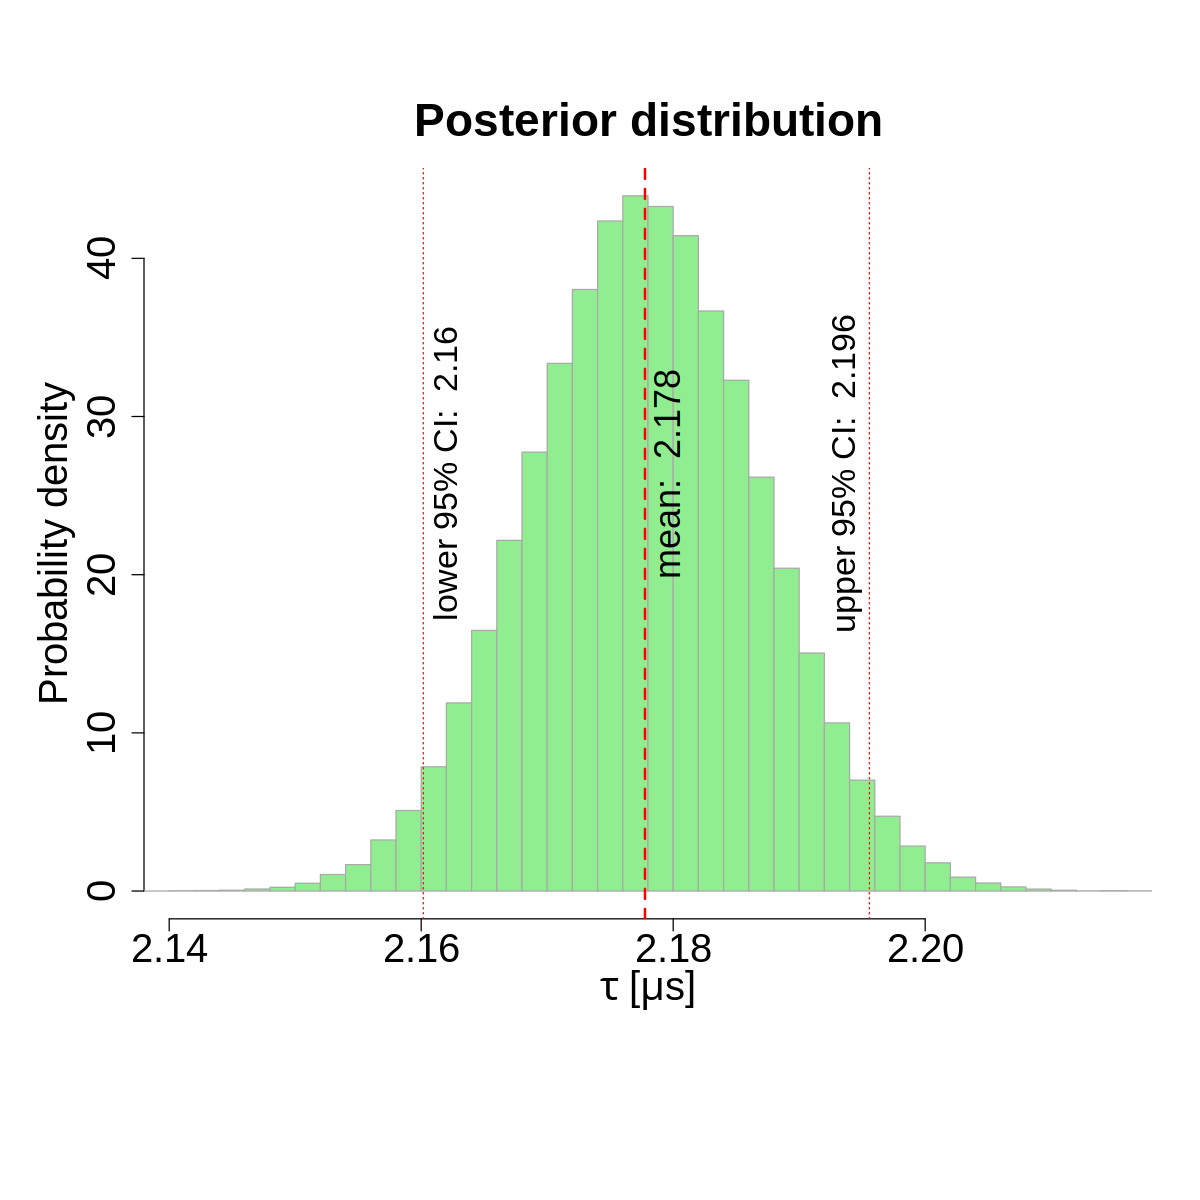

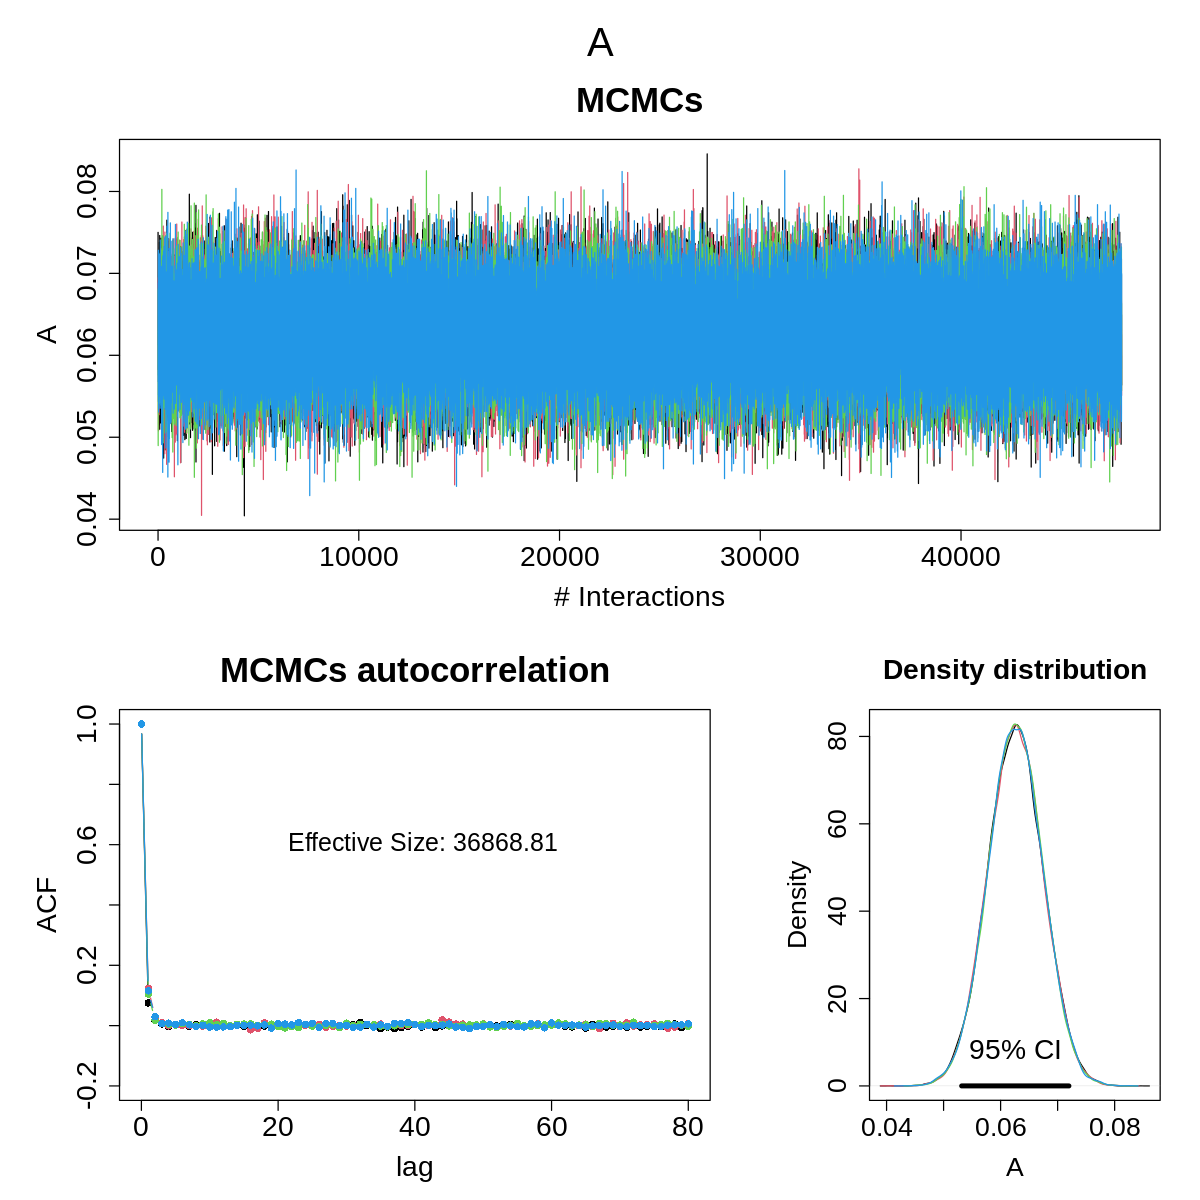

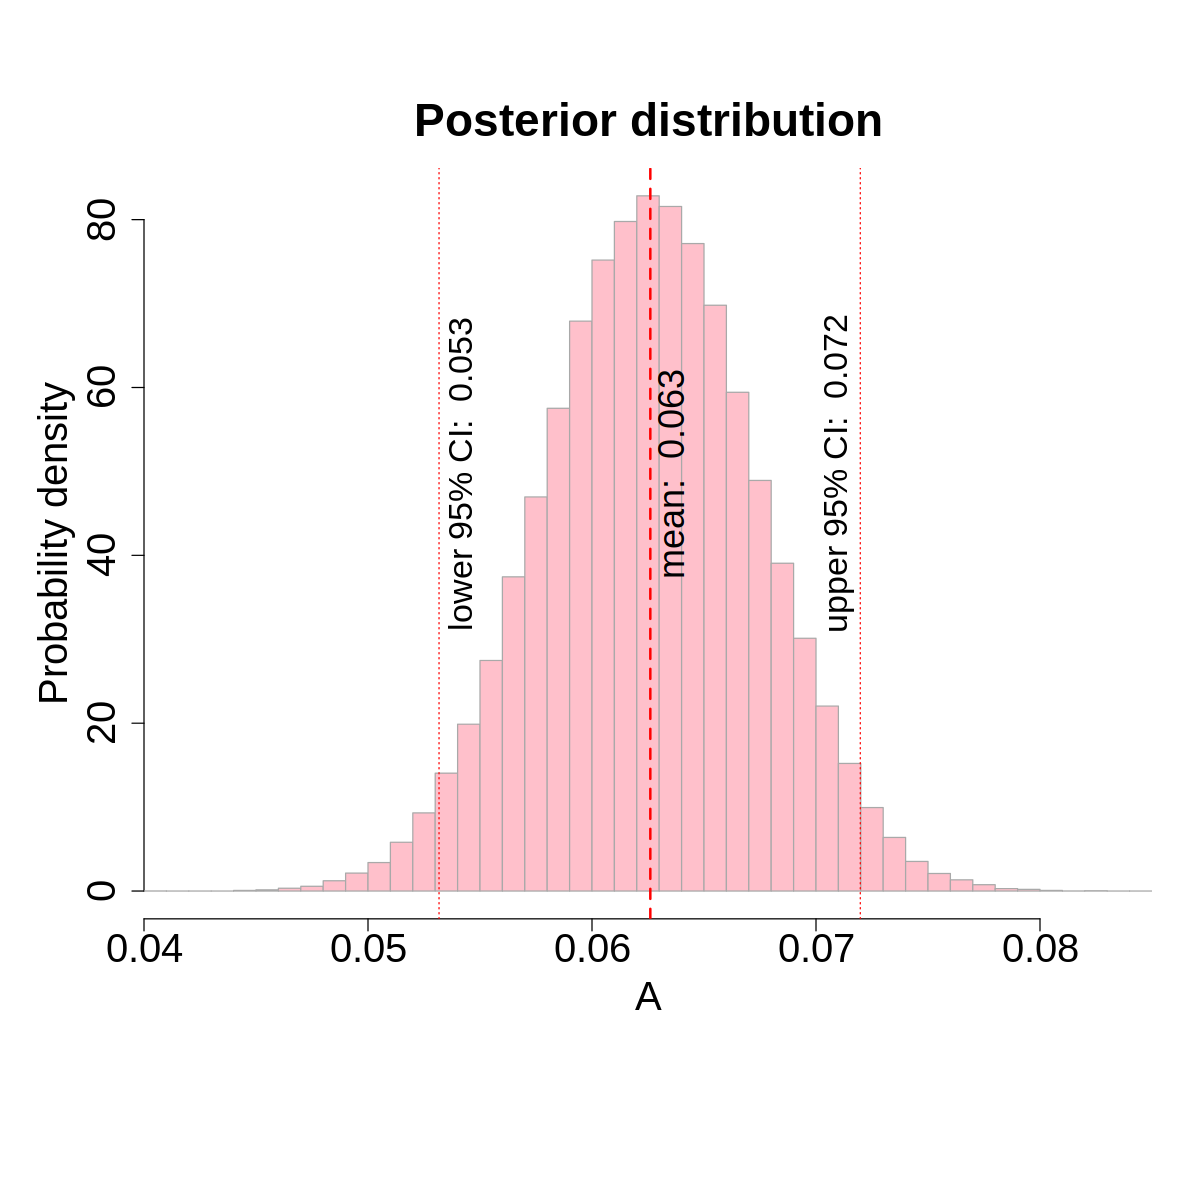

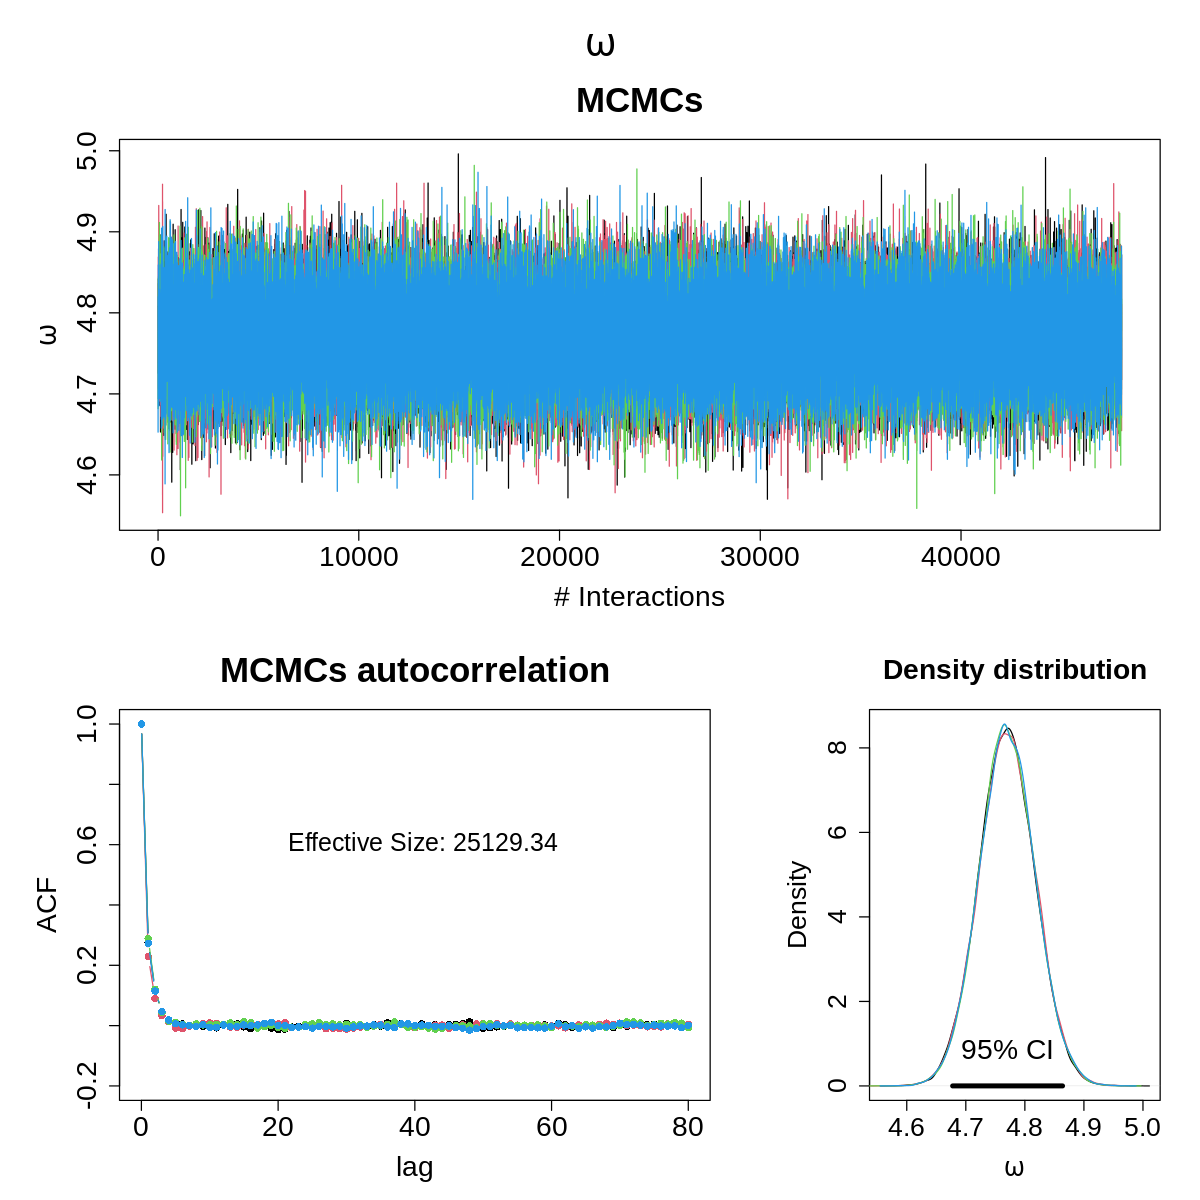

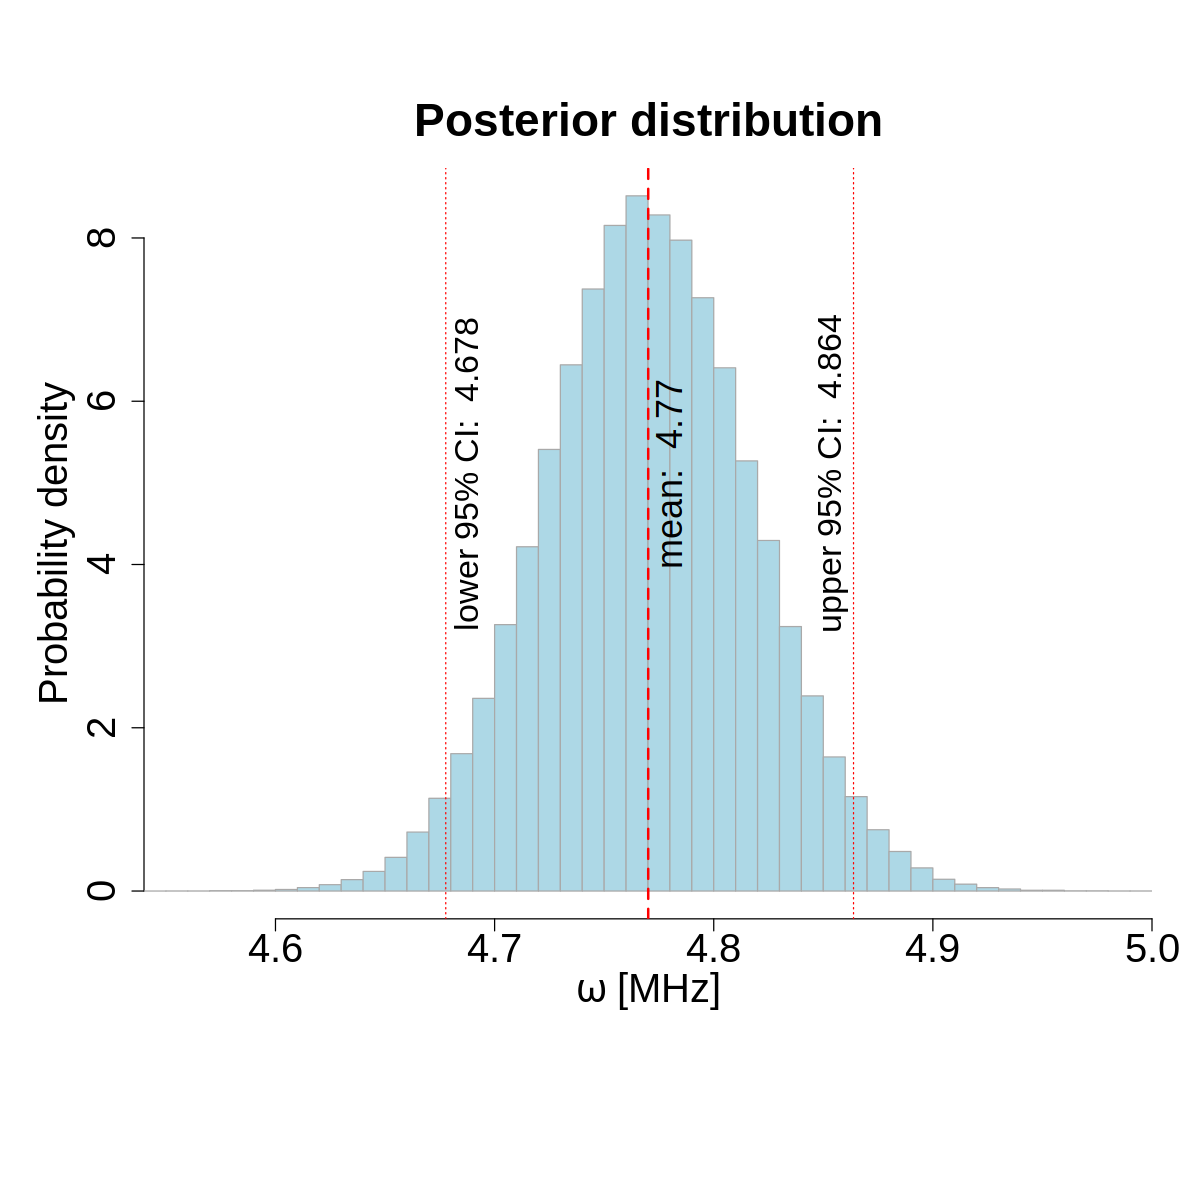

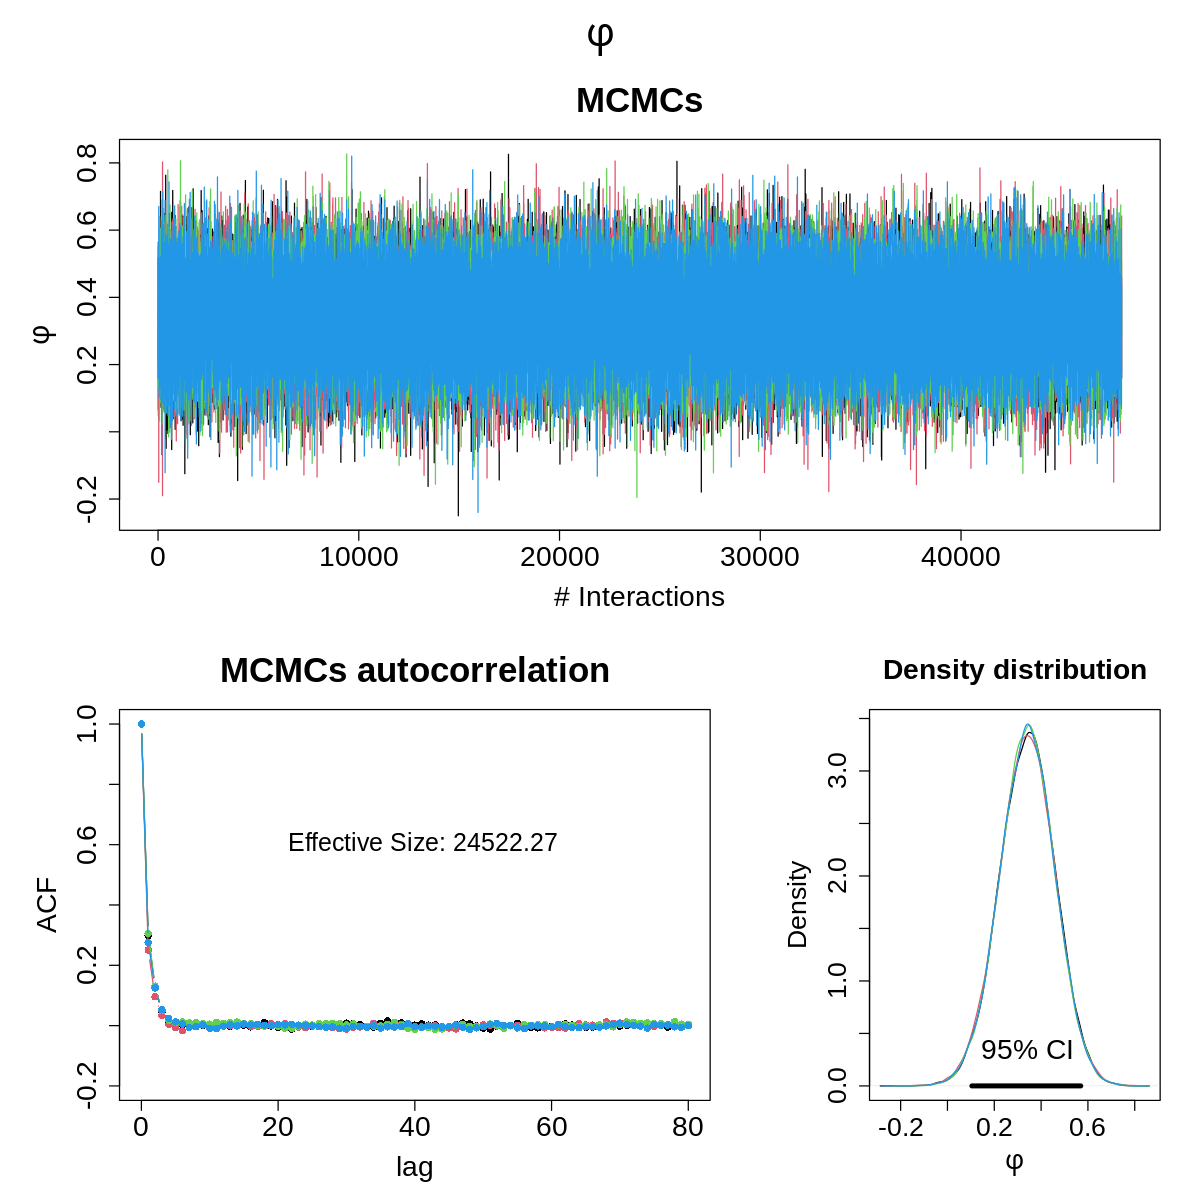

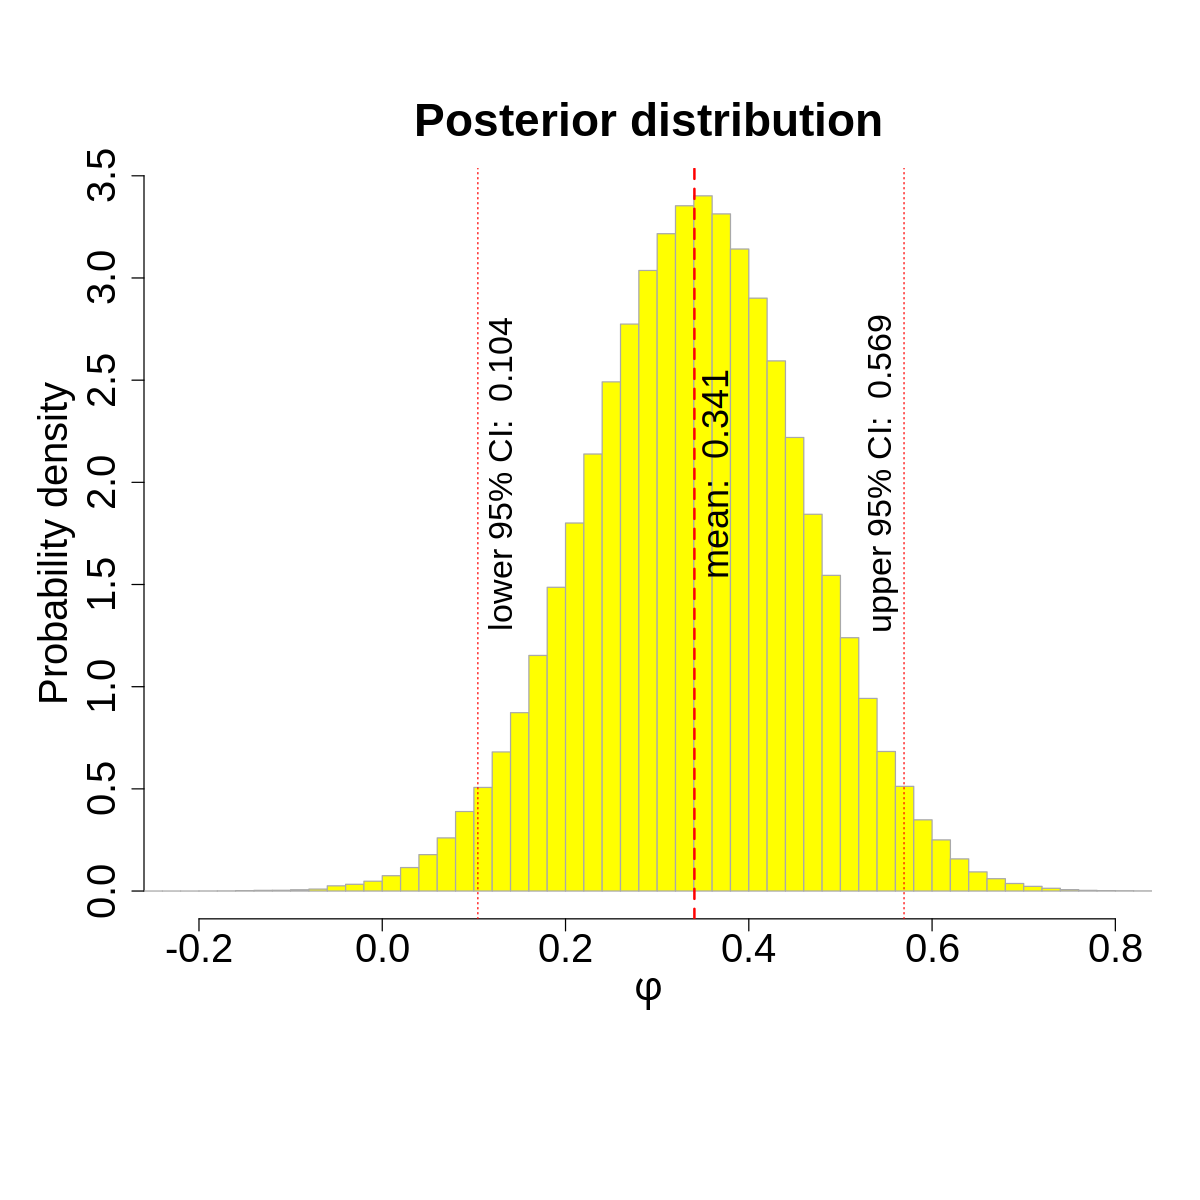

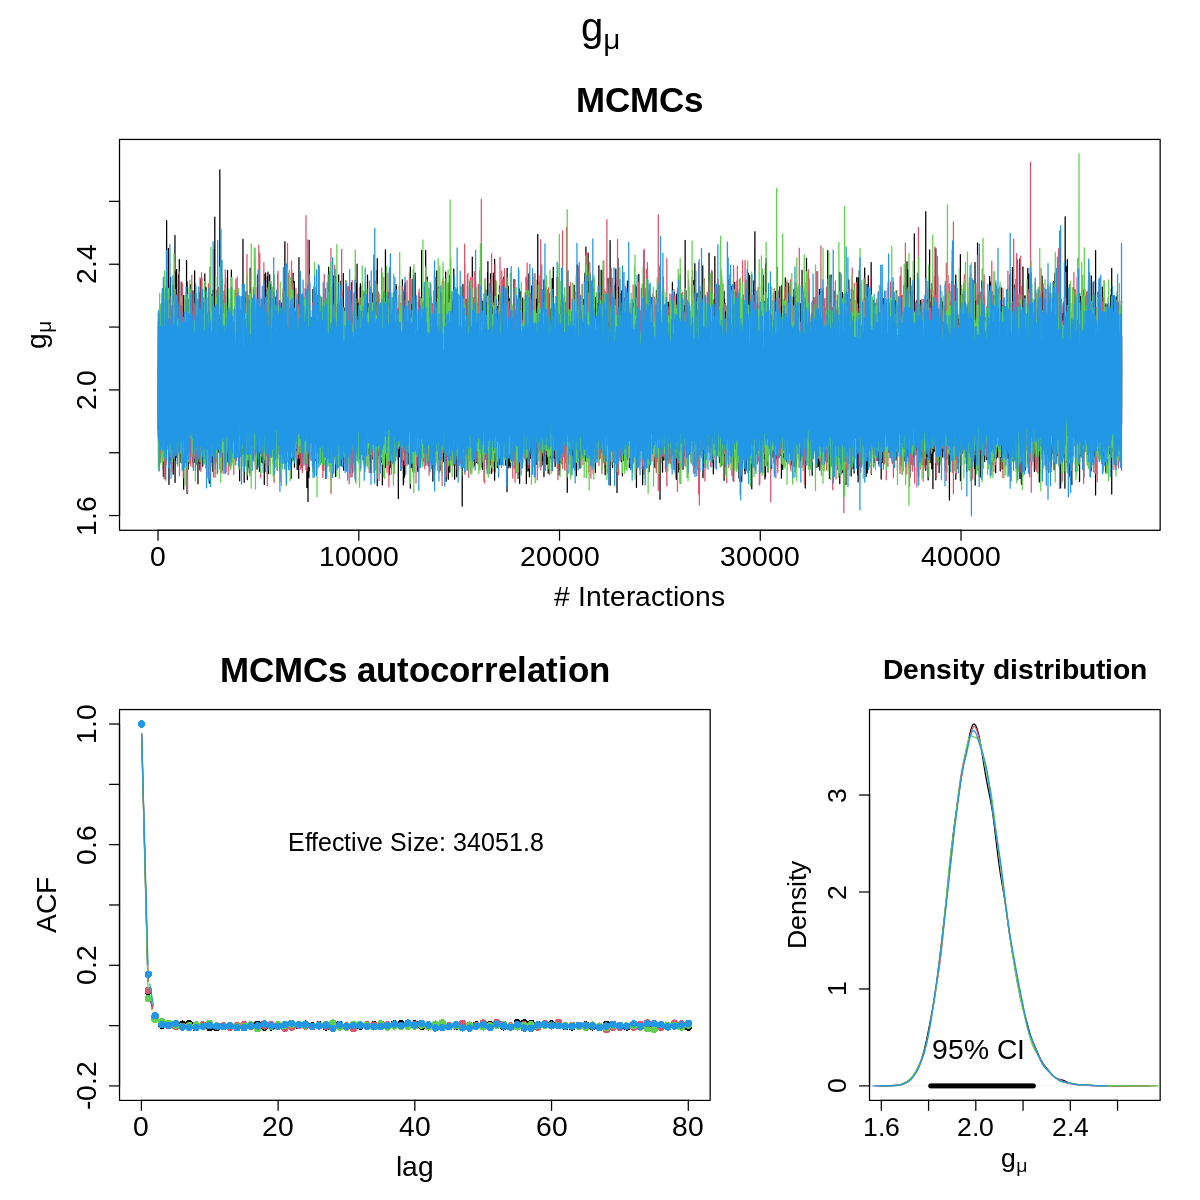

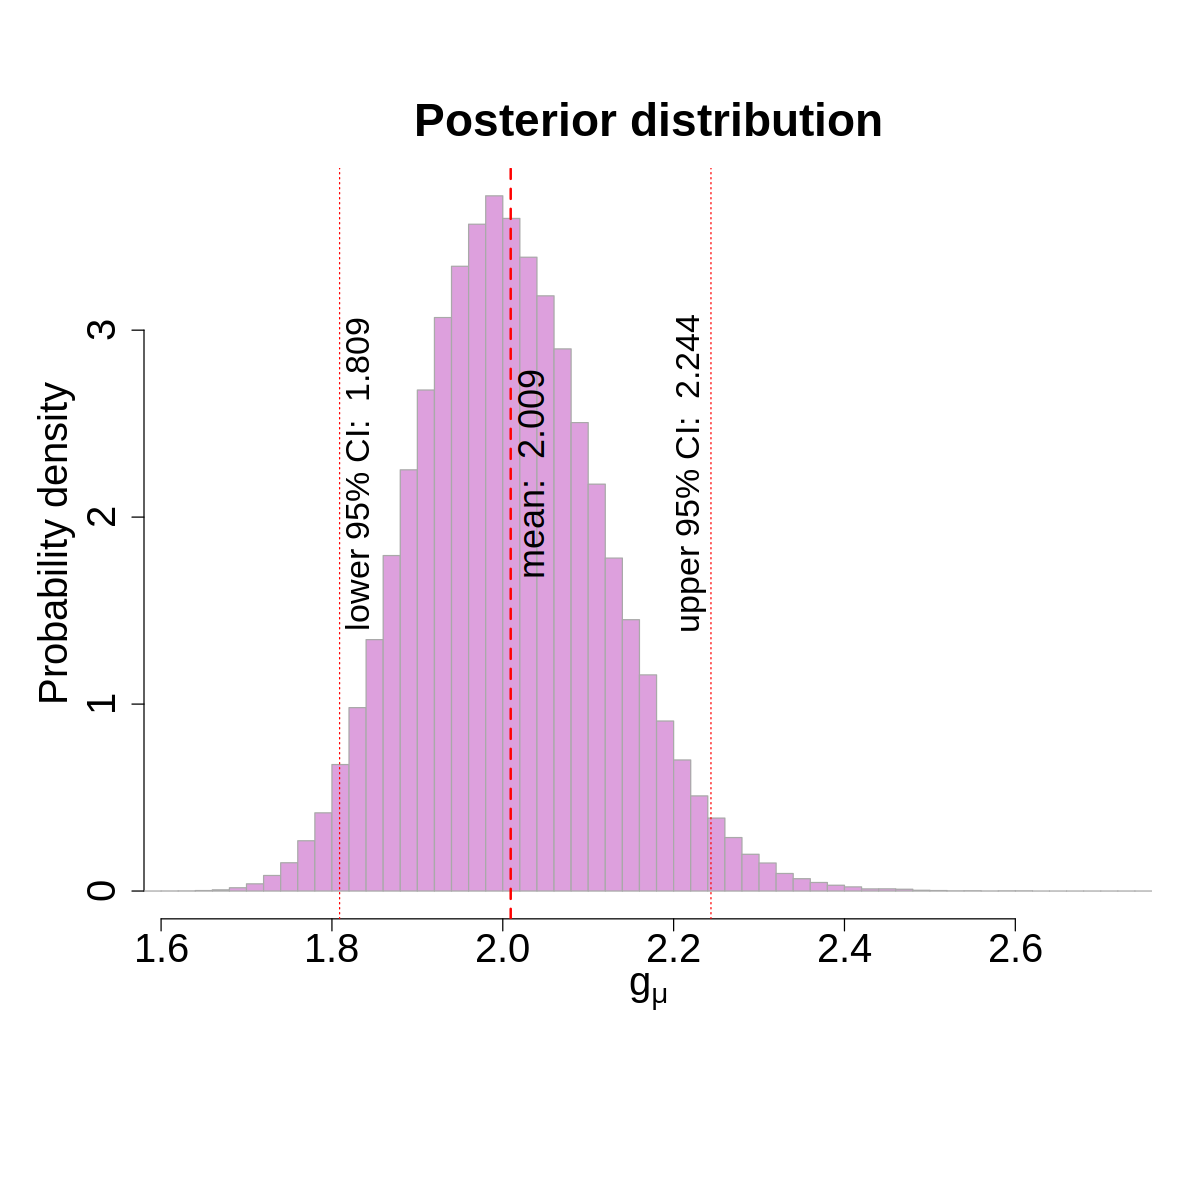

In [18]:
which.model <- 2
n.chains <- 4
STAN_B_array.mcmc <- analysis.bayes(stan.string, data.stan, which.model, nIter = 50000, nChains = n.chains, thin = 1, warmup=2000)

result.STAN.withB <- PlotPosteriorParam(STAN_B_array.mcmc, which.model)

## PARAMETERS CORRELATION IN STAN

In [19]:
library(dplyr)
library(corrplot)


Caricamento pacchetto: ‘dplyr’


I seguenti oggetti sono mascherati da ‘package:stats’:

    filter, lag


I seguenti oggetti sono mascherati da ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.95 loaded



In [20]:
# combine sequentially all chains to get get one single dataframe for collelations
latexParamsPost <- switch(which.model, c(expression(N[0]), expression(tau~"["*mu*"s"*"]")), c(expression(N[0]), expression(tau~"["*mu*"s"*"]"),
                                                                                expression(A), expression(omega~"[MHz]"), 
                                                                                expression(phi), expression(g[mu]) ))

which.model <- 2 # with B
n.chains <- n.chains
params <- switch( which.model, c("N0","tau") , c("N0","tau","A","omega","phi",'gmu') )
df <- lapply( params, function(p) { sapply(1:n.chains, function(j) STAN_B_array.mcmc[, j, p]) |> as.vector() } ) |> as.data.frame()
names(df) <- params
df <- df %>% select(-gmu) # remove column "gmu"                                
cat("Correlation matrix \n")
cor(df)

Correlation matrix 


,N0,tau,A,omega,phi
N0,1.00000000,-0.75259899,0.06213756,-0.21094063,0.28841840
tau,-0.75259899,1.00000000,-0.04170158,0.14525208,-0.21028773
A,0.06213756,-0.04170158,1.00000000,-0.05663703,0.07435737
omega,-0.21094063,0.14525208,-0.05663703,1.00000000,-0.76409163
phi,0.28841840,-0.21028773,0.07435737,-0.76409163,1.00000000


Warning message in strwidth(newrownames, cex = tl.cex):
“conversione fallita da 'τ [μs]' in 'mbcsToSbcs': punto sostituito per <cf>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversione fallita da 'τ [μs]' in 'mbcsToSbcs': punto sostituito per <84>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversione fallita da 'τ [μs]' in 'mbcsToSbcs': punto sostituito per <ce>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversione fallita da 'τ [μs]' in 'mbcsToSbcs': punto sostituito per <bc>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversione fallita da 'ω [MHz]' in 'mbcsToSbcs': punto sostituito per <cf>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversione fallita da 'ω [MHz]' in 'mbcsToSbcs': punto sostituito per <89>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversione fallita da 'ϕ [rad]' in 'mbcsToSbcs': punto sostituito per <cf>”
Warning message in strwidth(newrownames, cex = tl.cex):
“conversio

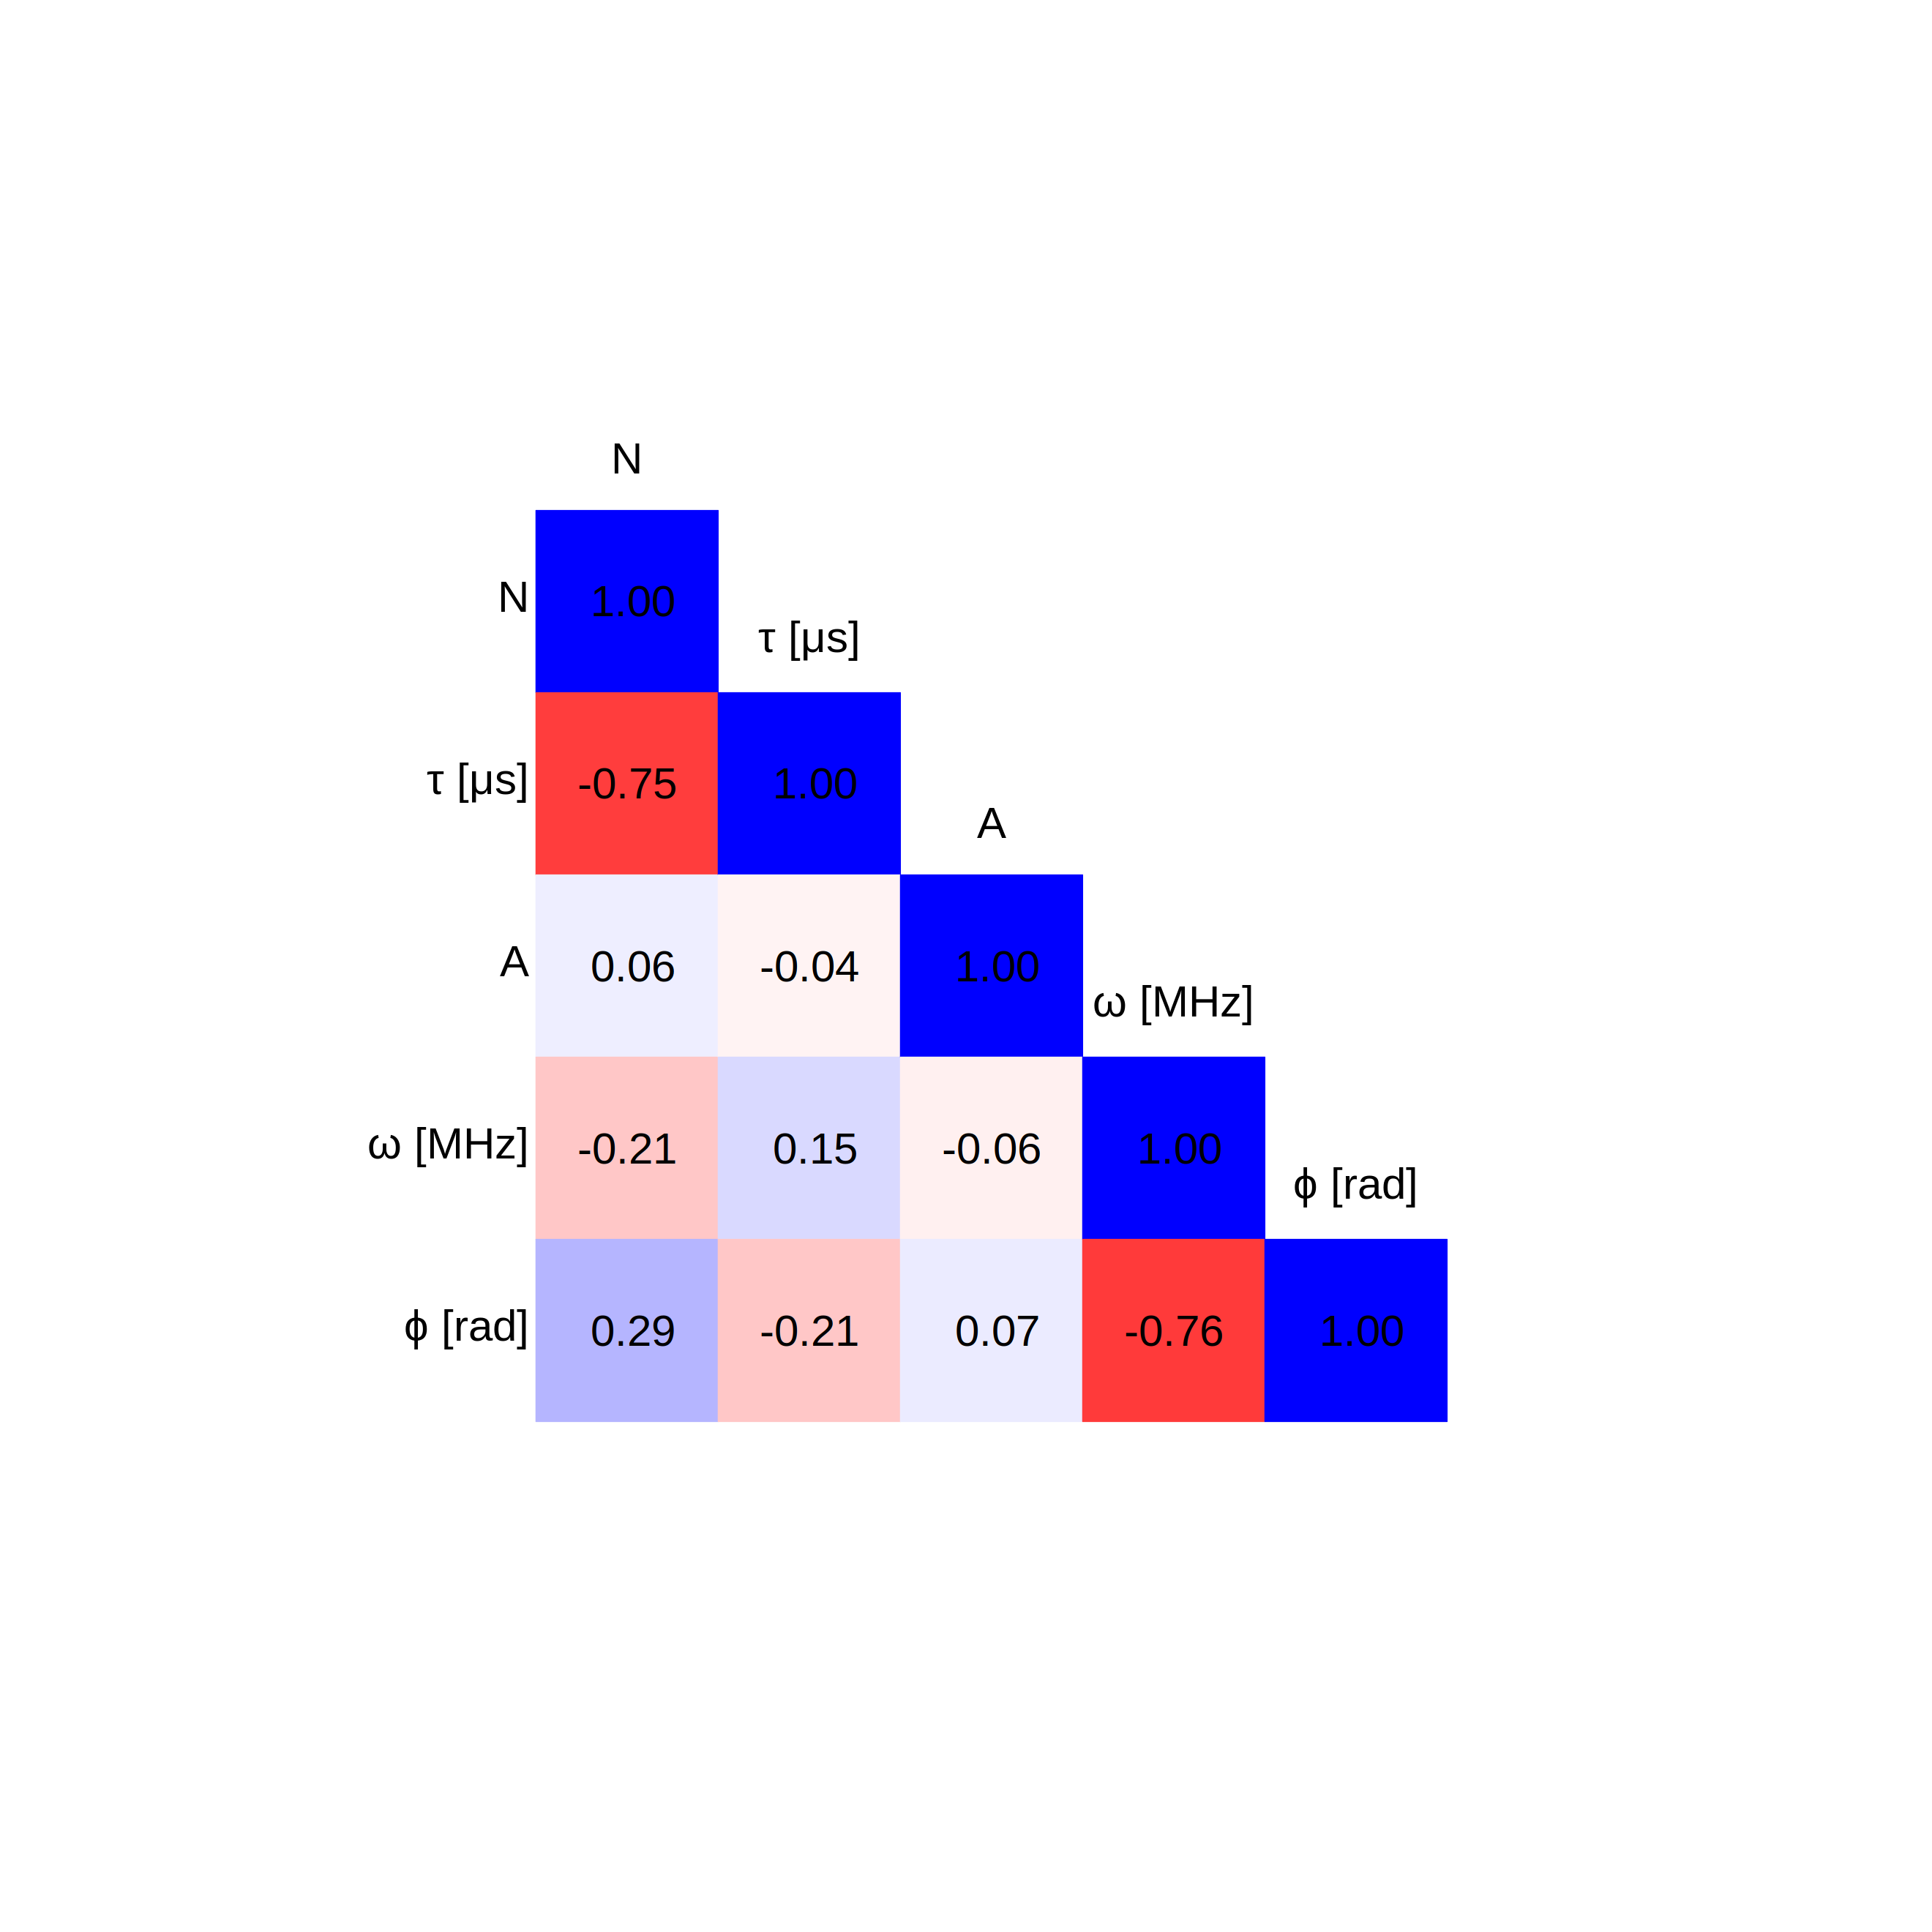

In [22]:
#install.packages("corrplot")
library(corrplot)

param_labels <- c(
  "N",          # N_0
  "\u03C4 [\u03BCs]", # tau[μs]
  "A", 
  "\u03C9 [MHz]",   # omega [rad/s]
  "\u03D5 [rad]"            # phi
)

corr_matrix <- cor(df)
colnames(corr_matrix) <- param_labels
rownames(corr_matrix) <- param_labels


options(repr.plot.width=22, repr.plot.height=22)
# png("correlation_matrix.png", width = 800, height = 800)
corrplot(corr_matrix,
         method = "color",
         type = "lower",
         addCoef.col = "black",
         tl.col = "black",
         tl.cex = 3,
         tl.srt = 0,
         number.cex = 3,
         number.font = 1,
         col = colorRampPalette(c("red", "white", "blue"))(200),
         diag = TRUE,
         cl.cex = 2,
         cl.pos = "n"
)
#dev.off()


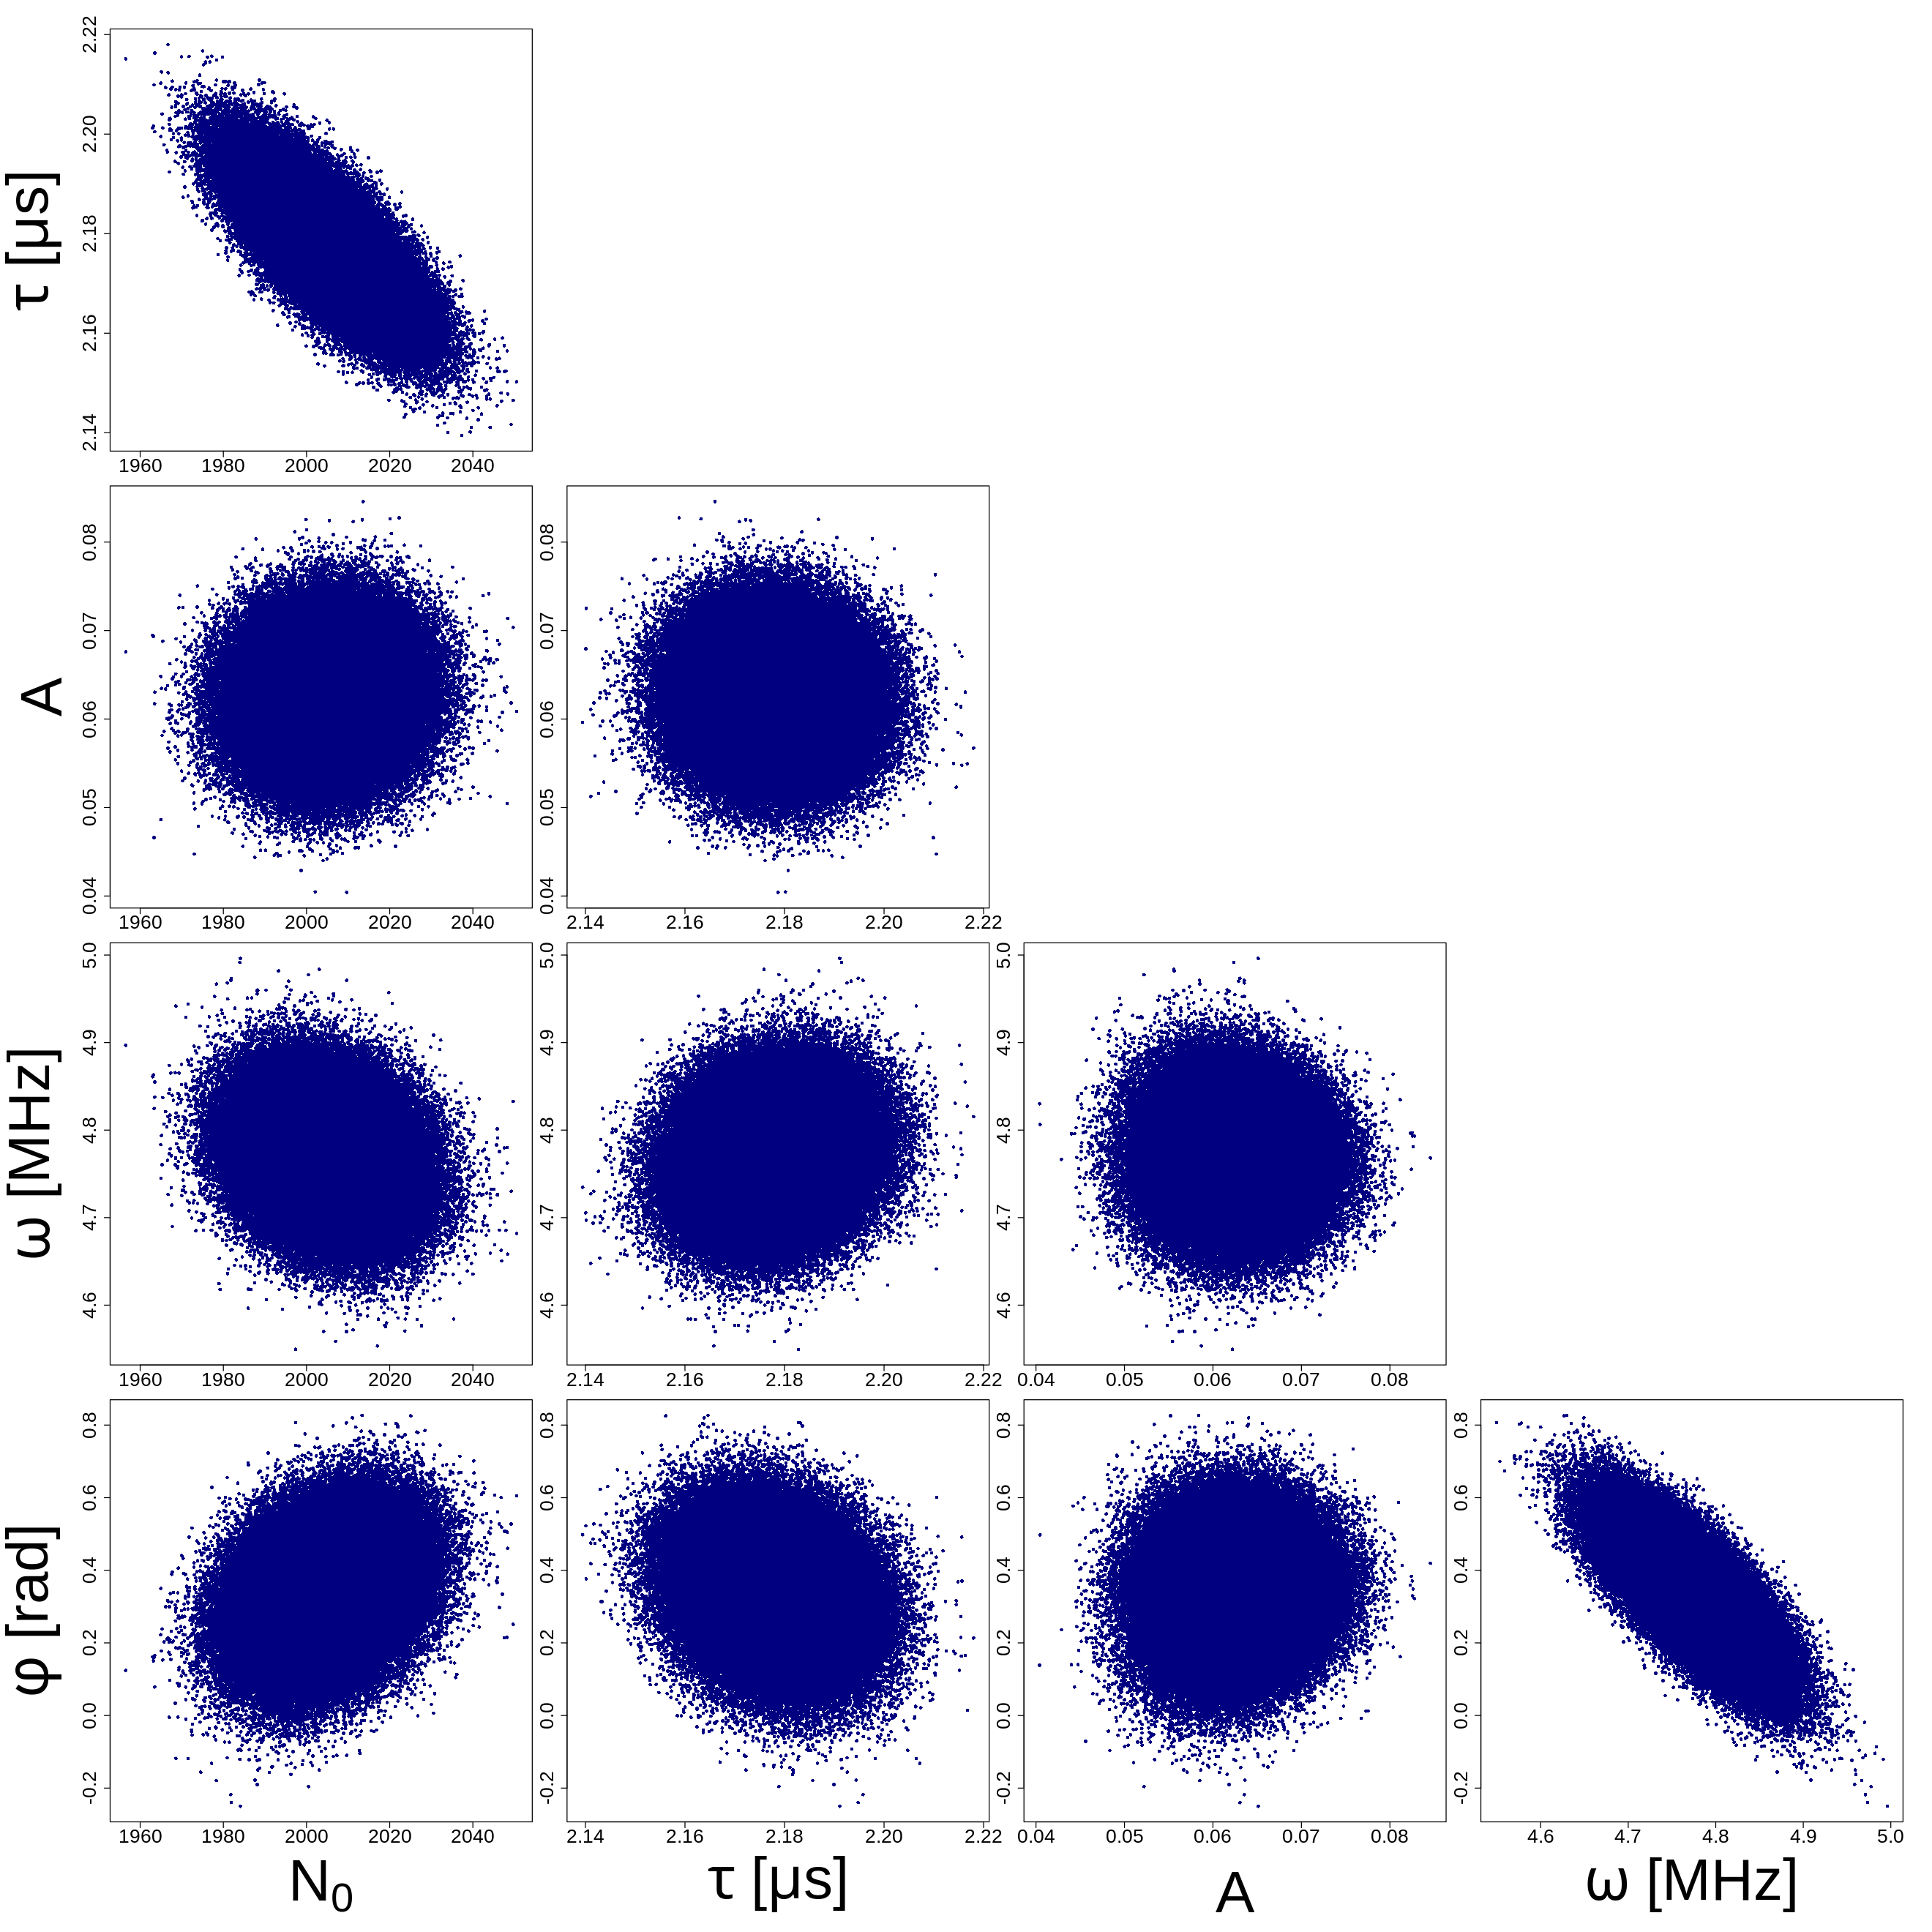

In [23]:
options(repr.plot.width = 22, repr.plot.height = 22)

params <- names(df)
n <- length(params)

param_labels <- list(
  expression(N[0]),
  expression(tau~"["*mu*"s"*"]"),
  expression(A),
  expression(omega~"[MHz]"),
  expression(phi~"[rad]")
)

# meshgrid (n-1) x (n-1)
layout(matrix(1:((n - 1) * (n - 1)), nrow = n - 1, byrow = TRUE))

# increase space between plots
par(mar = c(2.5, 2.5, 0.5, 0.5), oma = c(7, 7, 2, 2))  # bottom, left, top, right

for (i in 2:n) {
  for (j in 1:(n - 1)) {
    if (j < i) {
      # Scatterplot 
      plot(df[[j]], df[[i]], xlab = "", ylab = "", main = "", 
           pch = 16, col = "navy", cex = 0.8, xaxt = "s", yaxt = "s", cex.axis = 2)
    } else {
      plot.new()  # empty cell
    }

    # Axis labels using math expressions
    if (i == n && j < n) {
      mtext(param_labels[[j]], side = 1, line = 7, cex = 4)
    }
    if (j == 1) {
      mtext(param_labels[[i]], side = 2, line = 4, cex = 4)  # left labels
    }
  }
}

# MCMC ANALYSIS: JAGS

In [ ]:
library(rjags)

In [ ]:
model.noB <- "
model {
  N0 ~ dnorm(2000, 1/100^2)
  tau ~ dunif(0.5, 5)

  for (i in 1:n) {
    mu[i] <- N0 * exp(-t[i]/tau)
    y[i] ~ dnorm(mu[i], 1/s[i]^2)
  }
}
"

model.withB <- "
model {

    N0 ~ dnorm(2000, 1/100^2)
    tau ~ dnorm(2.15, 1 / (0.1^2))
    A ~ dunif(0, 1)
    omega ~ dnorm(4.75, 1/(1)^2)
    phi ~ dunif(-3.14159, 3.14159)

    # Prior for B (if uncertain)
    B ~ dnorm(5.6, 1 / (0.3^2))  # mT

    e <- 1.602e-19     #C
    m <- 1.8835e-28    #kg  

    #G_mu posterior
    gmu <- (2 * m * omega*1e6) / (e * B * 1e-3)

    
    for (i in 1:n) {
    y[i] ~ dnorm(N0 * exp(-t[i] / tau) * (1 + A * cos(omega * t[i] + phi)), 1 / (s[i] * s[i]))
    }
    
}
"

In [ ]:
analysis.bayes.rjags <- function(model.string, data.list, which.model, nIter = 5000, nChains = 2, thin = 1) {
  
  model.code <- switch(which.model, model.noB, model.withB)
  jags.model <- jags.model(textConnection(model.code), data = data.list, n.chains = nChains, quiet=TRUE)
  
  update(jags.model, 500)  # burn-in
  
  params <- switch(which.model, c("N0", "tau"), c("N0", "tau", "A", "omega", "phi", 'gmu'))
  samples <- coda.samples(jags.model, variable.names = params, n.iter = nIter, thin = thin)
  
  cat(switch(which.model, "WITHOUT B\n", "WITH B\n"))
  print(summary(samples))
  
  return(samples)
}

In [ ]:
data.jags <- lapply(1:2, function(i) {
  list(n = length(t), t = data[[i]]$t, y = data[[i]]$y, s = data[[i]]$s)
})

In [ ]:
mcmc.list.to.array <- function(mcmc.list.obj) {
  n.iter <- niter(mcmc.list.obj[[1]])
  n.chain <- length(mcmc.list.obj)
  param.names <- colnames(mcmc.list.obj[[1]])
  n.param <- length(param.names)

  array.mcmc <- array(NA, dim = c(n.iter, n.chain, n.param),
                      dimnames = list(NULL, NULL, param.names))

  for (j in 1:n.chain) {
    array.mcmc[, j, ] <- as.matrix(mcmc.list.obj[[j]])
  }

  return(array.mcmc)
}

In [ ]:
#Sample from jags markov chain
which.model <- 1
samples <- analysis.bayes.rjags(model.string = NULL, data.list = data.jags[[which.model]], which.model = which.model, nIter = 50000, nChains = 4, thin = 1)

#Using the same plotting function as STAN, converting into correct format
JAGS_NoB_array.mcmc <- mcmc.list.to.array(samples)
result.JAGS.noB <- PlotPosteriorParam(JAGS_NoB_array.mcmc, which.model = which.model)

In [ ]:
#Sample from jags markov chain
which.model <- 2
samples <- analysis.bayes.rjags(model.string = NULL, data.list = data.jags[[which.model]], which.model = which.model, nIter = 50000, nChains = 4, thin = 1)

#Using the same plotting function as STAN, converting into correct format
JAGS_B_array.mcmc <- mcmc.list.to.array(samples)
result.JAGS.withB <- PlotPosteriorParam(JAGS_B_array.mcmc, which.model = which.model)

# FITS AND COMPARISONS

In [ ]:
plot.data.fit <- function(dataNoB, dataB, fitNoB=NULL, fitB = NULL) {
    options(repr.plot.width=16,repr.plot.heigth=8)
    
    par(mfrow=c(1,2))
    # log scale
    
      #Plot without B
      plot(dataNoB$t, pmax(dataNoB$y,1), log="y", yaxt="n", type="n",
            xlab=expression("Time ["*mu*"s]"), ylab="Counts", main='Model fit without B',
            cex.main=2, cex.axis=1.8, cex.lab=1.8)

      arrows(dataNoB$t, dataNoB$y-dataNoB$s, dataNoB$t, dataNoB$y+dataNoB$s,
                  angle=90, code=3, length=0.02, col="lightblue")

      points(dataNoB$t, pmax(dataNoB$y,1), pch=16, col="red", cex = 0.5)

      yticks <- 10^(0:5)
      axis(2, at = yticks,
     labels = parse(text = paste0("10^", 0:5)),
     las = 1, cex.axis = 1.8)



      #axis(2, at=10^(0:5), labels=parse(text=paste0("10^", 0:5)), las=1)

      if (!is.null(fitNoB)) {
            lines(dataNoB$t,fitNoB[[1]], col="green", lwd = 3)
            lines(dataB$t,fitNoB[[2]], col="blue" , lty=3, lwd = 3)
            legend(4,1700, legend=c("Data", "STAN", 'JAGS'), col = c("red","green", 'blue'), bty="n",
      pch=c(19, NA, NA),lty=c(NA,1, 3),lwd=c(NA,3,3),cex=1.5,seg.len=0.5,x.intersp=0.2)
      }


      #Plot with B
      plot(dataB$t, pmax(dataB$y,1), log="y", yaxt="n", type="n",
            xlab=expression("Time ["*mu*"s]"), ylab="Counts", main='Model fit with B',
            cex.main=2, cex.axis=1.8, cex.lab=1.8)

      arrows(dataB$t, dataB$y-dataB$s, dataB$t, dataB$y+dataB$s,
                  angle=90, code=3, length=0.02, col="lightblue")

      points(dataB$t, pmax(dataB$y,1), pch=16, col="red", cex = 0.5)


      yticks <- 10^(0:5)
      axis(2, at = yticks,
     labels = parse(text = paste0("10^", 0:5)),
     las = 1, cex.axis = 1.8)


      #axis(2, at=10^(0:5), labels=parse(text=paste0("10^", 0:5)), las=1)

      if (!is.null(fitB)) {
            lines(dataB$t,fitB[[1]], col="green", lwd = 3)
            lines(dataB$t,fitB[[2]], col="blue" , lty=3, lwd = 3)
            legend(4,1700, legend=c("Data", "STAN", 'JAGS'), col = c("red","green", 'blue'), bty="n",
      pch=c(19, NA, NA),lty=c(NA,1, 3),lwd=c(NA,3,3),cex=1.5,seg.len=0.5,x.intersp=0.2)
      }


   }

In [ ]:
N0 <- result.STAN.noB[["N[0]"]]
tau <- result.STAN.noB[["tau"]]
STAN.graph.noB <- Exp.decay(data.noB$t, N0, tau)

N0.jags <- result.JAGS.noB[["N[0]"]]
tau.jags <- result.JAGS.noB[["tau"]]
JAGS.graph.noB <- Exp.decay(data.withB$t, N0.jags, tau.jags)

FitCurvesNoB <- list('STAN'=STAN.graph.noB, 'JAGS'=JAGS.graph.noB)

N0 <- result.STAN.withB[["N[0]"]]
tau <- result.STAN.withB[["tau"]]
A <- result.STAN.withB[["A"]]
omega <- result.STAN.withB[["omega"]]
phi <- result.STAN.withB[["phi"]]

N0.jags <- result.JAGS.withB[["N[0]"]]
tau.jags <- result.JAGS.withB[["tau"]]
A.jags <- result.JAGS.withB[["A"]]
omega.jags <- result.JAGS.withB[["omega"]]
phi.jags <- result.JAGS.withB[["phi"]]


STAN.graph.withB <- Exp.decay.oscill(data.withB$t, N0, tau, omega, A, phi)
JAGS.graph.withB <- Exp.decay.oscill(data.withB$t, N0.jags, tau.jags, omega.jags, A.jags, phi.jags)

FitCurvesB <- list('STAN'= STAN.graph.withB, 'JAGS'=JAGS.graph.withB)



par(mar = c(5, 6, 4, 2))
options(repr.plot.width = 16, repr.plot.height = 6)
plot.data.fit(data.noB, data.withB, fitNoB=FitCurvesNoB, fitB = FitCurvesB)

In [ ]:
# residues
#Exp.decay <- function(t, N0, TAU) { return(N0 * exp(-t/TAU)) }
#Exp.decay.oscill <- function(t, N0, TAU, OMEGA, A, phi) { return( N0 * exp(-t/TAU) * (1 + A*cos(OMEGA*t+phi)) ) }

par(mar = c(5, 6, 4, 2))

residues <- data.withB
residues$y <- residues$y - Exp.decay(residues$t, N0, tau)
plot(residues$t, residues$y, pch=16, col="red", xlab=expression("Time ["*mu*"s]"), ylab="Counts", main="Residuals",
        cex.axis=2,cex.main=2.5,cex.lab=2, ylim=c(-150, 160)
)
arrows(residues$t, residues$y-residues$s, residues$t, residues$y+residues$s, angle=90, code=3, length=0.02, col="lightblue")


#cat("Il risultato vero dal fit sarebbe stato A:",A,"Invece settato A:",A)
fit.residues.stan <- N0 * exp(-residues$t/tau) * A * cos(omega*residues$t+phi)
fit.residues.jags <- N0.jags * exp(-residues$t/tau.jags) * A.jags * cos(omega.jags*residues$t+phi.jags)

lines(residues$t, fit.residues.stan, col="green", lty=1, lwd = 3)
lines(residues$t, fit.residues.jags, col="blue" , lty=3, lwd = 3)
#lines(residues$t, N0 * A * exp(-residues$t/tau), col="orange", lty=9, lwd = 3)
#lines(residues$t, - N0 * A * exp(-residues$t/tau), col="orange", lty=9, lwd = 3)
legend("topright", legend=c("Data", "STAN", "JAGS"), col = c("red","green","blue"), bty="n",
        pch=c(19, NA, NA),lty=c(NA,1, 3),lwd=c(NA,3,3),cex=1.5,seg.len=0.5,x.intersp=0.2)

# Comparison between STAN and JAGS posterior distribution

In [ ]:

options(repr.plot.width = 10, repr.plot.height = 9)

par(mar = c(5, 6, 4, 2))

hist(JAGS_NoB_array.mcmc[, , 'tau'], 
     col = rgb(1, 0, 0, 0.6),  # red, 50% transparent
     border = "gray",
     xlim = range(c(JAGS_NoB_array.mcmc[, , 'tau'], STAN_NoB_array.mcmc[, , 'tau'])),
     breaks = 60,
     main = expression(bold("Comparison of "*tau*" posterior")),
     xlab = expression(tau~"["*mu*"s"*"]"),
     freq = FALSE,
     cex.axis=2,
     cex.main=2.5,
     cex.lab=2 
     )

hist(STAN_NoB_array.mcmc[, , 'tau'], 
     col = rgb(0, 0, 1, 0.6),  # blue, 50% transparent
     border = "gray",
     add = TRUE,
     freq = FALSE,
     breaks = 60)

mean_jags <- mean(JAGS_NoB_array.mcmc[, , 'tau'])
mean_stan <- mean(STAN_NoB_array.mcmc[, , 'tau'])

# Add vertical lines for means
abline(v = mean_jags, col = "red", lwd = 2, lty = 2)
abline(v = mean_stan, col = "blue", lwd = 2, lty = 2)

# Add vertical text with the mean values
text(x = mean_jags - 0.03, 
     y = par("usr")[4] * 0.8,  # 80% of max y-axis
     labels = paste0("JAGS: ", round(mean_jags, 3)),
     col = "red", 
     srt = 0,
     adj = 0, 
     cex = 2.4)

text(x = mean_stan + 0.01, 
     y = par("usr")[4] * 0.8,
     labels = paste0("STAN: ", round(mean_stan, 3)),
     col = "blue", 
     srt = 0,
     adj = 0, 
     cex = 2.4)

In [ ]:
#layout(matrix(c(1, 1, 2, 3), nrow = 2, byrow = TRUE))
options(repr.plot.width = 10, repr.plot.height = 15)


par(mfrow=c(2, 1), mar= c(5, 6, 4, 2))
# === OMEGA ===
hist(JAGS_B_array.mcmc[, , 'omega'], 
     col = rgb(1, 0, 0, 0.6),
     border = "gray",
     xlim = range(c(JAGS_B_array.mcmc[, , 'omega'], STAN_B_array.mcmc[, , 'omega'])),
     breaks = 60,
     main = expression(bold("Comparison of "*omega*" Posterior")),
     xlab = expression(omega~"[MHz]"),
     freq = FALSE,
     cex.axis = 2.3,
     cex.main = 2.8,
     cex.lab = 2.3)

hist(STAN_B_array.mcmc[, , 'omega'], 
     col = rgb(0, 0, 1, 0.6),
     border = "gray",
     add = TRUE,
     freq = FALSE,
     breaks = 60)

mean_jags_omega <- mean(JAGS_B_array.mcmc[, , 'omega'])
mean_stan_omega <- mean(STAN_B_array.mcmc[, , 'omega'])

abline(v = mean_jags_omega, col = "red", lwd = 2, lty = 2)
abline(v = mean_stan_omega, col = "blue", lwd = 2, lty = 2)

text(x = mean_jags_omega - 0.16, y = par("usr")[4] * 0.6,
     labels = paste0("JAGS: ", round(mean_jags_omega, 3)),
     col = "red", srt = 0, adj = 0, cex = 2)

text(x = mean_stan_omega + 0.08, y = par("usr")[4] * 0.6,
     labels = paste0("STAN: ", round(mean_stan_omega, 3)),
     col = "blue", srt = 0, adj = 0, cex = 2)

# === GMU ===
hist(JAGS_B_array.mcmc[, , 'gmu'], 
     col = rgb(1, 0, 0, 0.6),
     border = "gray",
     xlim = range(c(JAGS_B_array.mcmc[, , 'gmu'], STAN_B_array.mcmc[, , 'gmu'])),
     breaks = 60,
     main = expression(bold("Comparison of "*g[mu]*" Posterior")),
     xlab = expression(g[mu]),
     freq = FALSE,
     cex.axis = 2.3,
     cex.main = 2.8,
     cex.lab = 2.3)

hist(STAN_B_array.mcmc[, , 'gmu'], 
     col = rgb(0, 0, 1, 0.6),
     border = "gray",
     add = TRUE,
     freq = FALSE,
     breaks = 60)

mean_jags_gmu <- mean(JAGS_B_array.mcmc[, , 'gmu'])
mean_stan_gmu <- mean(STAN_B_array.mcmc[, , 'gmu'])

abline(v = mean_jags_gmu, col = "red", lwd = 2, lty = 2)
abline(v = mean_stan_gmu, col = "blue", lwd = 2, lty = 2)

text(x = mean_jags_gmu - 0.38, y = par("usr")[4] * 0.6,
     labels = paste0("JAGS: ", round(mean_jags_gmu, 3)),
     col = "red", srt = 0, adj = 0, cex = 2)

text(x = mean_stan_gmu + 0.15, y = par("usr")[4] * 0.6,
     labels = paste0("STAN: ", round(mean_stan_gmu, 3)),
     col = "blue", srt = 0, adj = 0, cex = 2)

# FREQUENTIS APPROACH

## Maximum Likelihood Estimation

Given data points:

$$
\{(t_i, y_i, \sigma_i)\}_{i=1}^n
$$

We assume each observation is drawn from a Gaussian distribution:

$$
y_i \sim \mathcal{N}(N_i(\theta), \sigma_i^2)
$$

Where the model prediction $N_i(\theta)$ depends on the presence or not of a magnetic field:

- **Without magnetic field (B = 0):**

$$
N_i(\theta) = N_0 \, e^{-t_i / \tau}
$$

with parameters $\theta = \{N_0, \tau\}$.

- **With magnetic field (B ≠ 0):**

$$
N_i(\theta) = N_0 \, e^{-t_i / \tau} \left[ 1 + A \cos(\omega t_i + \phi) \right]
$$

with parameters $\theta = \{N_0, \tau, A, \omega, \phi\}$.

Then, the log-likelihood function to maximize is (computationally we minimize the negative log-likelihood):

$$
\log \mathcal{L}(\theta) = -\frac{1}{2} \sum_{i=1}^n \left[ \log(2\pi \sigma_i^2) + \frac{(y_i - N_i(\theta))^2}{\sigma_i^2} \right]
$$

The covariance matrix of the estimated parameters is approximated by the inverse of the Hessian of the negative log-likelihood:

$$
\text{Cov}(\hat{\theta}) \approx \left[ \nabla^2 (-\log \mathcal{L}(\theta)) \right]^{-1}_{\theta = \hat{\theta}}
$$

The uncertainty on each parameter $\theta_i$ is estimated by:

$$
\sigma_{\theta_i} \approx \sqrt{ \text{Cov}_{ii} }
$$

---

Finally, the muon $g$-factor is computed using the Larmor relation:

$$
g_\mu = \frac{2 m_\mu \omega}{e B}
$$

The uncertainty on $g_\mu$ is computed by standard error propagation:

$$
\sigma_{g_\mu} = \sqrt{
\left( \frac{\partial g_\mu}{\partial \omega} \cdot \sigma_\omega \right)^2 +
\left( \frac{\partial g_\mu}{\partial B} \cdot \sigma_B \right)^2
}
= \sqrt{
\left( \frac{2 m_\mu}{e B} \cdot \sigma_\omega \right)^2 +
\left( \frac{2 m_\mu \omega}{e B^2} \cdot \sigma_B \right)^2
}
= g_\mu \cdot \sqrt{
\left( \frac{\sigma_\omega}{\omega} \right)^2 +
\left( \frac{\sigma_B}{B} \right)^2
}
$$

In [82]:
# ---------- NO MAGNETIC FIELD ----------
neglogL_noB <- function(par, t, y, s) {
  N0 <- par[1]; tau <- par[2]
  N <- N0 * exp(-t / tau)
  sum((y - N)^2 / s^2 + log(2 * pi * s^2)) / 2
}
options(repr.plot.width = 21, repr.plot.height = 7)


fit_noB <- optim(c(1000, 2), neglogL_noB, t = data.noB$t, y = data.noB$y, s = data.noB$s,
                 method = "L-BFGS-B", lower = c(1e-6, 1e-6), hessian = TRUE)

params_noB <- fit_noB$par
stderr_noB <- sqrt(diag(solve(fit_noB$hessian)))
cov_noB <- solve(fit_noB$hessian)
names(params_noB ) <- c("N0", "tau")
colnames(cov_noB) <- rownames(cov_noB) <- names(params_noB)


# ---------- WITH MAGNETIC FIELD ----------
neglogL_B <- function(par, t, y, s) {
  N0 <- par[1]; tau <- par[2]; A <- par[3]; omega <- par[4]; phi <- par[5]
  N <- N0 * exp(-t / tau) * (1 + A * cos(omega * t + phi))
  sum((y - N)^2 / s^2 + log(2 * pi * s^2)) / 2
}

start <- c(2000, 2, 0.2, 6, 0)
fit_B <- optim(start, neglogL_B, t = data.withB$t, y = data.withB$y, s = data.withB$s,
               method = "L-BFGS-B",
               lower = c(1e-6, 1e-6, -1, 1e-6, -pi), upper = c(Inf, Inf, 1, Inf, pi),
               hessian = TRUE)

params_B <- fit_B$par
stderr_B <- sqrt(diag(solve(fit_B$hessian)))
cov_B <- solve(fit_B$hessian)

names(params_B) <- c("N0", "tau", "A", "omega", "phi")
names(stderr_B) <- c("N0", "tau", "A", "omega", "phi")
colnames(cov_B) <- rownames(cov_B) <- names(params_B)

# ---------- g_mu COMPUTATION ----------
omega <- params_B["omega"] * 1e6  # MHz → Hz
omega_err <- stderr_B["omega"] * 1e6

B_mean <- 5.6e-3  # Tesla
B_sigma <- 0.3e-3

g_mu <- (2 * MASS.kg * omega) / (e * B_mean)
g_mu_err <- g_mu * sqrt((omega_err / omega)^2 + (B_sigma / B_mean)^2)

# ---------- OUTPUT: WITHOUT MAGNETIC FIELD ----------
cat("=== Fit WITHOUT magnetic field ===\n")
cat("-----------------------------\n")
for (i in seq_along(params_noB)) {
  name <- names(params_noB)[i]
  val <- round(params_noB[i], 5)
  err <- round(stderr_noB[i], 5)
  cat(name, "        ", val, "±", err, "\n")
}
cat("\nCorrelation matrix (no B):\n")
print(round(cov2cor(cov_noB), 3))

# ---------- OUTPUT: WITH MAGNETIC FIELD ----------
cat("\n=== Fit WITH magnetic field ===\n")
cat("-----------------------------\n")
for (i in seq_along(params_B)) {
  name <- names(params_B)[i]
  val <- round(params_B[i], 5)
  err <- round(stderr_B[i], 5)
  cat(name, "        ", val, "±", err, "\n")
}

cat("\n-----------------------------\n")
cat("g_mu           ", round(g_mu, 6), "±", round(g_mu_err, 6), "\n")
cat("-----------------------------\n")

cat("\nCorrelation matrix (with B):\n")
print(round(cov2cor(cov_B), 3))


=== Fit WITHOUT magnetic field ===
-----------------------------
N0          2000.565 <U+00B1> 10.07184 
tau          2.19316 <U+00B1> 0.00901 

Correlation matrix (no B):
        N0    tau
N0   1.000 -0.749
tau -0.749  1.000

=== Fit WITH magnetic field ===
-----------------------------
N0          1999.981 <U+00B1> 10.52252 
tau          2.19294 <U+00B1> 0.00924 
A          0.0625 <U+00B1> 0.00485 
omega          4.72496 <U+00B1> 0.04121 
phi          0.6409 <U+00B1> 0.11229 

-----------------------------
g_mu            1.983822 <U+00B1> 0.107676 
-----------------------------

Correlation matrix (with B):
          N0    tau      A  omega    phi
N0     1.000 -0.762  0.111 -0.188  0.262
tau   -0.762  1.000 -0.081  0.127 -0.193
A      0.111 -0.081  1.000 -0.041  0.053
omega -0.188  0.127 -0.041  1.000 -0.744
phi    0.262 -0.193  0.053 -0.744  1.000


# COMPARISON OF THE CREDIBILITY INTERVAL

In [ ]:
NO_B_FreqTau <- c(params_noB['tau'], stderr_noB[2])

NO_B_StanTau <- c(mean(STAN_NoB_array.mcmc[, , 'tau']), quantile(STAN_NoB_array.mcmc[, , 'tau'], c(0.025, 0.975)))
NO_B_JagsTau <- c(mean(JAGS_NoB_array.mcmc[, , 'tau']), quantile(JAGS_NoB_array.mcmc[, , 'tau'], c(0.025, 0.975)))


B_FreqTau <- c(params_B['tau'], stderr_B[2])
B_StanTau <- c(mean(STAN_B_array.mcmc[, , 'tau']), quantile(STAN_B_array.mcmc[, , 'tau'], c(0.025, 0.975)))
B_JagsTau <- c(mean(JAGS_B_array.mcmc[, , 'tau']), quantile(JAGS_B_array.mcmc[, , 'tau'], c(0.025, 0.975)))


B_Freqomega <- c(params_B['omega'], stderr_B[2])
B_Stanomega <- c(mean(STAN_B_array.mcmc[, , 'omega']), quantile(STAN_B_array.mcmc[, , 'omega'], c(0.025, 0.975)))
B_Jagsomega <- c(mean(JAGS_B_array.mcmc[, , 'omega']), quantile(JAGS_B_array.mcmc[, , 'omega'], c(0.025, 0.975)))

B_Freqgmu <- c(g_mu, g_mu_err)
B_Stangmu <- c(mean(STAN_B_array.mcmc[, , 'gmu']), quantile(STAN_B_array.mcmc[, , 'gmu'], c(0.025, 0.975)))
B_Jagsgmu <- c(mean(JAGS_B_array.mcmc[, , 'gmu']), quantile(JAGS_B_array.mcmc[, , 'gmu'], c(0.025, 0.975)))

In [120]:
PlotComp <- function(Freq, STAN, JAGS, title, xlab, Omega = F){

      if (Omega){
            xlim <- c(STAN[2] - 0.01*STAN[2], STAN[3] + 0.01*STAN[3])
      }
      else{
            xlim <- c(Freq[1] - 1.96*Freq[2]*1.2, Freq[1] + 1.96*Freq[2]*1.5)
      }
      plot(Freq[1], 1, xlim = range(xlim),cex = 2,pch = 16,col = "red", ylab = '', xlab='', ylim=range(c(0.6, 1.6)),
      cex.axis = 2,cex.main = 2.5,cex.lab = 2.5, yaxt='n')
      text(Freq[1], 1.05, labels = round(Freq[1], 3), cex = 1.3)
      arrows(Freq[1] - 1.96*Freq[2], 1, 
            Freq[1] + 1.96*Freq[2], 1, length = 0.05, angle = 90, code = 3, col = "red",lwd = 3)


      points(STAN[1], 1.2, cex = 2,pch = 17, col = "blue")
      text(STAN[1], 1.25, labels = round(STAN[1], 3), cex = 1.3)
      arrows(STAN[2], 1.2, STAN[3], 1.2,length = 0.05, angle = 90, code = 3, col = "blue",lwd = 3)


      points(JAGS[1], 0.8, cex = 2, pch = 18, col = "purple")
      text(JAGS[1], 0.85, labels = round(JAGS[1], 3), cex = 1.3)
      arrows(JAGS[2], 0.8, JAGS[3], 0.8,
            length = 0.05, angle = 90, code = 3, col = "purple", lwd = 3) 

      # Add labels and legend with bigger text
      title(main = title, cex.main = 2.3)
      mtext(xlab, side = 1, line = 2.5, cex = 1.8)

      legend("topleft", 
            legend = c("Freq", "STAN", "JAGS"),  
            col = c("red", "blue", "purple"),
            pch = c(16, 17, 18), 
            pt.cex = 1, cex = 2.1,         
            bty = "n",         
            bg = "white",      
            box.col = "white", 
            y.intersp = 1, )
            #inset = c(-0.08, 0))
}


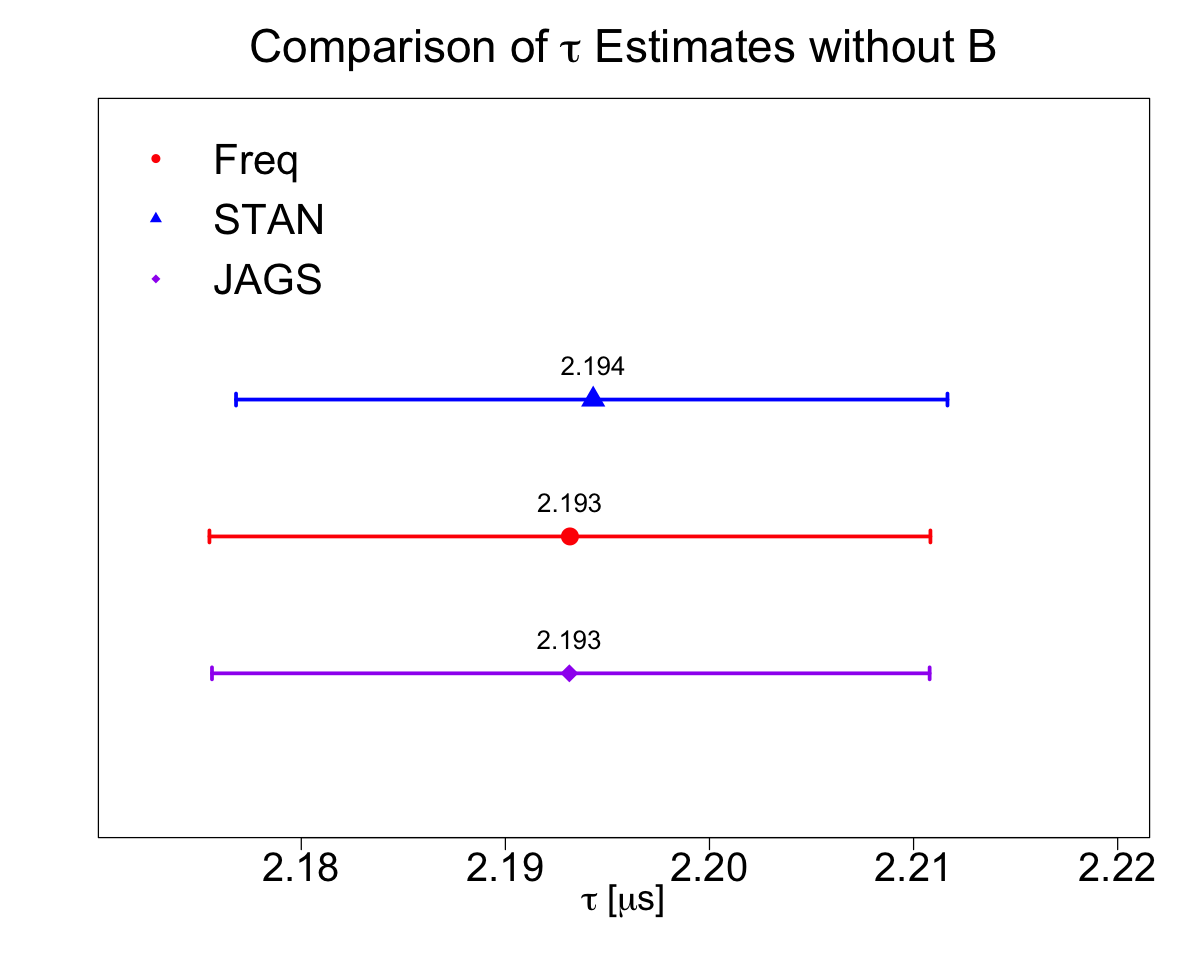

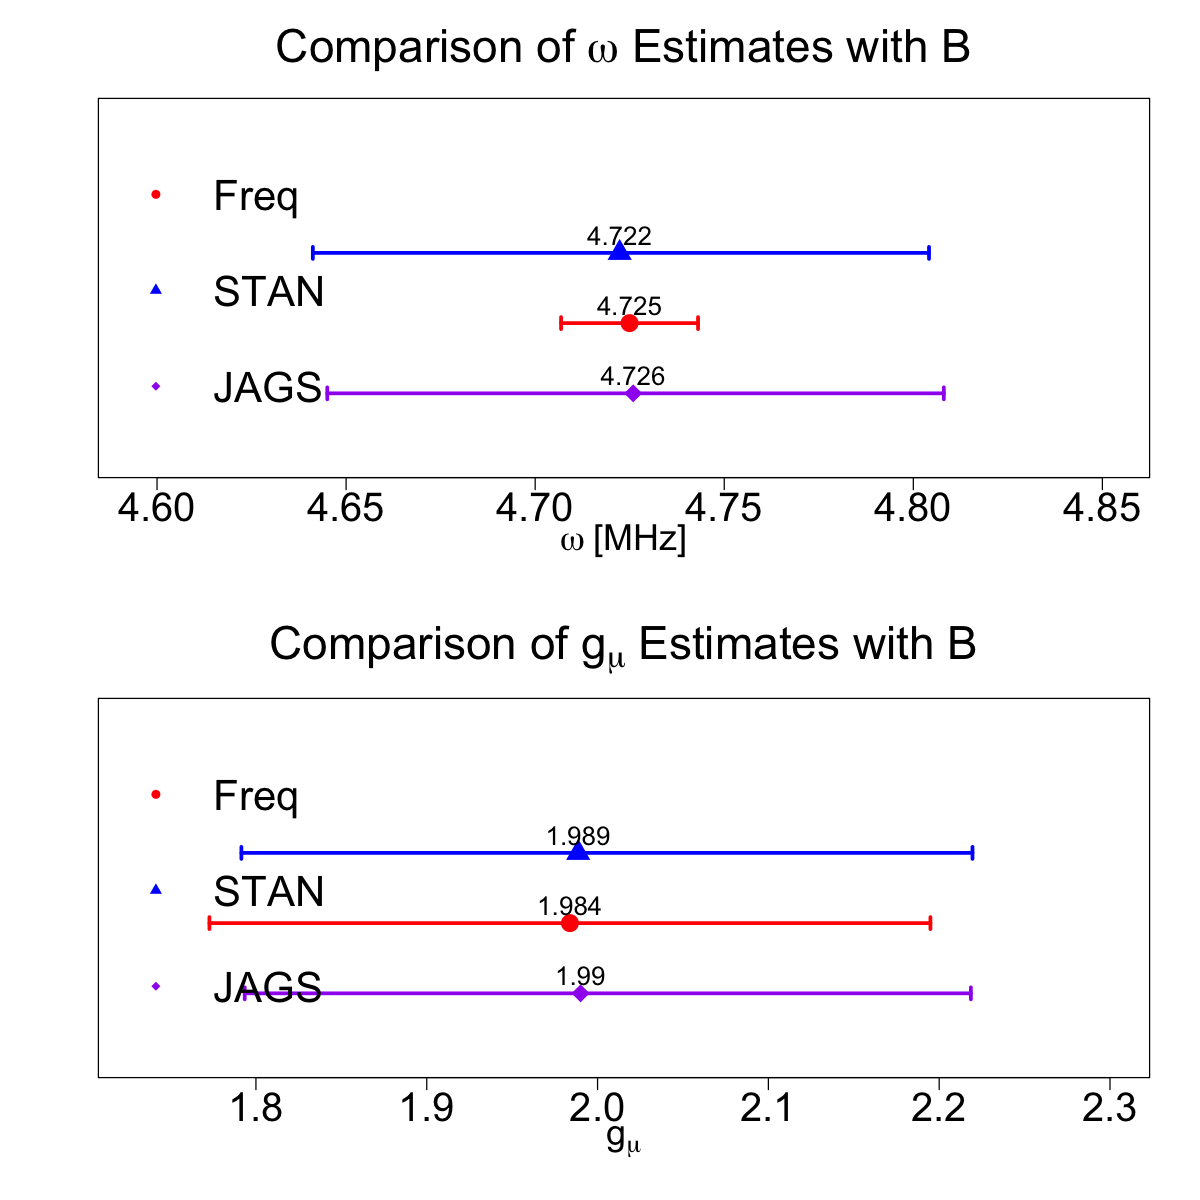

In [122]:
#par(mfrow = c(2, 2))

options(repr.plot.width = 10, repr.plot.height = 8)
PlotComp(NO_B_FreqTau, NO_B_StanTau, NO_B_JagsTau, expression("Comparison of " *tau*" Estimates without B"), expression(tau~"["*mu*"s"*"]"))
#PlotComp(B_FreqTau, B_StanTau, B_JagsTau, "Comparison of tau Estimates with B", 'tau')

options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow = c(2, 1 ))
PlotComp(B_Freqomega, B_Stanomega, B_Jagsomega,  expression("Comparison of " *omega*" Estimates with B"), expression(omega~ "[MHz]"), Omega=T)
PlotComp(B_Freqgmu, B_Stangmu, B_Jagsgmu,  expression("Comparison of " *g[mu]*" Estimates with B"), expression(g[mu]))